#**Project: Fraud Detection of Online Payment**

#**Dataset: [Online Payment Fraud Detection](https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection/data)**

#**Members:**
1. **ประทีป ปัญญนนทกานต์ รหัสนิสิต 66199160164**
2. **ธนกฤต พลอยเกตุ รหัสนิสิต 66199160265**

# Fraud Detection คืออะไร?
* Fraud Detection คือ กระบวนการตรวจจับการทุจริตและการฉ้อโกง โดยในปัจจุบัน AI และ ML มีบทบาทอย่างมากในกระบวนการส่วนนี้เนื่องจากสามารถวิเคราะห์ข้อมูลจำนวนมากได้พร้อมๆ กัน ทั้งยังสามารถตรวจสอบรูปแบบ และกิจกรรมที่มีแนวโน้มจะเกี่ยวข้องกับการฉ้อโกงได้

* โดยในโปรเจคนี้จะเป็นการตรวจจับการฉ้อโกงของธุรกรรมออนไลน์ (Fraud Detection of Online Payment) ซึ่งจะใช้โมเดลจาก Machine Learning มาทำการทดลองวิเคราะห์และวัดประสิทธิภาพที่ได้


# สิ่งที่จะทำหลักๆ ในโปรเจคนี้
1.  เปรียบเทียบประสิทธิภาพของแก้ไขปัญหา Imbalanced data ในแต่ละเทคนิค โดยใช้โมเดล Random Forest Classifier เป็นโมเดลที่ใช้ในการวัด ซึ่งในโปรเจคนี้จะใช้ทั้งหมด 3 เทคนิคด้วยกัน ได้แก่<br>
    1.  Random Undersampling <br>
    2.  Random Oversampling <br>
    3.  SMOTE <br>

2.   ทำ Feature Selection ด้วยวิธี Permutation Feature Importance และวัดประสิทธิภาพของแต่ละโมเดล โดยใช้ข้อมูลที่ได้จากการแก้ไขปัญหา Imbalanced data ซึ่งค่า Threshold ที่ใช้ในการเลือก Feature ที่สำคัญจะเลือกเฉพาะ Feature ที่มีค่า Importance Mean Score มากกว่า 0 เท่านั้น โดยโมเดลที่จะใช้นั้น จะประกอบด้วยทั้งหมด 3 โมเดล ได้แก่
    1. Logistic Regression
    2. Support Vector Machine
    3. Gradient Boosting
3.  ทำ Dimensionality Reduction ด้วยวิธี Principal Component Analysis หรือ PCA ซึ่งจะทำตั้งแต่การค้นหาค่า n_component ที่ให้ค่า Accuracy ที่สูงที่สุดในแต่ละโมเดลและชุดข้อมูล จากนั้นจึงจะนำค่า n_component ที่ดีที่สุดนี้ไปทำ PCA และวัดประสิทธิภาพที่ได้ผ่านแต่ละโมเดลและชุดข้อมูล
4. เปรียบเทียบประสิทธิภาพของแต่ละโมเดลและชุดข้อมูล โดยการเปรียบเทียบระหว่างการใช้ข้อมูลเต็ม Feature และการทำ Feature Selection และระหว่างการทำ Feature Selection เทียบกับการทำ PCA ว่า แบบใดที่จะทำให้โมเดลมีประสิทธิภาพที่ดีขึ้นมากกว่ากัน
5.
เลือกชุดข้อมูลและรูปแบบ Feature ที่ทำให้แต่ละโมเดลมีค่า Accuracy สูงที่สุด มาทำการสร้างโมเดลอีกครั้ง และปรับจูนค่าพารามิเตอร์ เพื่อหาค่าพารามิเตอร์ที่ดีที่สุด รวมถึงการนำโมเดลที่ผ่านการ Train เรียบร้อยแล้ว มาทำการวัดประสิทธิภาพด้วย Unseen data หรือ Test data
6. สร้าง Visualization ของข้อมูลที่ได้จากการทำ PCA แล้วดูว่า จุดที่โมเดลมีการจำแนกผิดนั้น มีความยากลำบากในการจำแนกมากหรือน้อยเพียงใด




# Import Libraries

In [ ]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Import Dataset

In [ ]:
# Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/ML_final_project/online_fraud.csv')

# Observe the first 10 rows of data
raw_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Check shape of dataset
raw_df.shape

(6362620, 11)

In [ ]:
# Check information of each column
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB




*   จากสำรวจข้อมูลเบื้องต้นพบว่า จำนวนข้อมูลของชุดข้อมูลนี้มีปริมาณค่อนข้างมาก ซึ่งด้วยข้อจำกัดของทรัพยากรที่ใช้ในการประมวลผล คือ Google Colab อาจจะทำให้ไม่สามารถรันโค๊ดทุกขั้นตอนจนเสร็จสิ้นได้ นอกจากนี้ยังรวมถึงระยะเวลาที่ใช้ในการประมวลผลในแต่ละขั้นตอน ซึ่งจะส่งให้ใช้เวลาค่อนข้างมากกว่าจะได้ผลลัพธ์ที่ต้องการ
<br> <br>
*   นอกจากนี้ยังพบว่า มีคอลัมน์ที่ซ้ำกันภายในชุดข้อมูลและเมื่อทำการตรวจสอบเพิ่มเติมแหล่งข้อมูลพบว่า คอลัมน์ที่ชื่อ isFlaggedFraud เป็นคอลัมน์ที่แสดงจำนวนธุรกรรมที่วัดได้อย่างถูกต้องว่าเป็นการฉ้อโกง ซึ่งเจ้าของชุดข้อมูลได้แนะนำให้ใช้เพียงคอลัมน์ isFraud สำหรับตัวแปร y
<br> <br>
*   ด้วยเหตุผลนี้ จึงตัดสินใจที่ลดปริมาณข้อมูลของชุดข้อมูลนี้ลงจากเดิมมีจำนวนข้อมูลทั้งสิ้น  6,362,620 แถว และ 11 คอลัมน์ ให้เหลือเพียง 50,000 แถว และ 11 คอลัมน์ เท่านั้น และจะทำการลบคอลัมน์ isFlaggedFraud ออกจากชุดข้อมูลนี้ด้วยเช่นกัน โดยก่อนหน้าที่จะทำการลดจำนวนข้อมูลลงมาเหลือ 50,000 แถว ได้มีการทดลองลดจำนวนข้อมูลลงจาก 6,362,620 แถว มาเป็น 300,000 แถว แต่ก็พบว่า ไม่สามารถรันโค๊ดได้จนเสร็จ จึงทำการทดลองลดลงมาเหลือ 200,000 แถว และ 100,000 แถว จนสุดท้ายก็สามารถรันโค๊ดได้ที่จำนวน 50,000 แถว

## Resampling Data

In [ ]:
# Check ration of class 0 and 1
print(raw_df['isFraud'].value_counts())
print(raw_df['isFraud'].value_counts(normalize=True))

isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [ ]:
# Resampling data
seed = 55
df = resample(raw_df, n_samples=50000, replace=False, stratify=raw_df['isFraud'],random_state=seed)

In [ ]:
# Check new shape of data
df.shape

(50000, 11)

In [ ]:
# Recheck ration of class 0 and 1
print(df['isFraud'].value_counts())
print(df['isFraud'].value_counts(normalize=True))

isFraud
0    49935
1       65
Name: count, dtype: int64
isFraud
0    0.9987
1    0.0013
Name: proportion, dtype: float64


In [ ]:
# Reset index of data
df.reset_index(inplace=True)

In [ ]:
# Drop index column
df.drop(columns=['index'], inplace=True)

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,187,PAYMENT,5673.88,C955292810,9902.00,4228.12,M1266361357,0.00,0.00,0,0
1,328,PAYMENT,20372.51,C1477490740,16926.00,0.00,M798805815,0.00,0.00,0,0
2,140,CASH_IN,78144.73,C91238610,1276839.82,1354984.54,C318937330,11416917.70,11338772.98,0,0
3,167,TRANSFER,117473.22,C590428987,0.00,0.00,C772973446,246796.45,364269.67,0,0
4,303,CASH_OUT,216352.97,C785349288,168392.00,0.00,C1292864233,0.00,216352.97,0,0
5,399,CASH_OUT,127602.88,C1441189668,125466.00,0.00,C743349272,36849.77,164452.65,0,0
6,235,CASH_IN,124256.20,C1784187824,1604538.05,1728794.25,C1293763768,813592.41,689336.21,0,0
7,299,CASH_IN,103666.92,C2046646910,29862.00,133528.92,C401376472,0.00,0.00,0,0
8,309,CASH_IN,2522.72,C212675646,5025.00,7547.72,C1176593869,490817.70,488294.99,0,0
9,235,PAYMENT,15181.25,C543829242,0.00,0.00,M846584311,0.00,0.00,0,0


## Removing Duplicate Column

In [ ]:
# Remove duplicate column
df = df.loc[:, df.columns != 'isFlaggedFraud']
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,187,PAYMENT,5673.88,C955292810,9902.00,4228.12,M1266361357,0.00,0.00,0
1,328,PAYMENT,20372.51,C1477490740,16926.00,0.00,M798805815,0.00,0.00,0
2,140,CASH_IN,78144.73,C91238610,1276839.82,1354984.54,C318937330,11416917.70,11338772.98,0
3,167,TRANSFER,117473.22,C590428987,0.00,0.00,C772973446,246796.45,364269.67,0
4,303,CASH_OUT,216352.97,C785349288,168392.00,0.00,C1292864233,0.00,216352.97,0
5,399,CASH_OUT,127602.88,C1441189668,125466.00,0.00,C743349272,36849.77,164452.65,0
6,235,CASH_IN,124256.20,C1784187824,1604538.05,1728794.25,C1293763768,813592.41,689336.21,0
7,299,CASH_IN,103666.92,C2046646910,29862.00,133528.92,C401376472,0.00,0.00,0
8,309,CASH_IN,2522.72,C212675646,5025.00,7547.72,C1176593869,490817.70,488294.99,0
9,235,PAYMENT,15181.25,C543829242,0.00,0.00,M846584311,0.00,0.00,0


# Explore Data Analysis

Dataset ชุดนี้ประกอบไปข้อมูลทั้งหมด 10 คอลัมน์ โดยมีรายละเอียดดังนี้

1.   step: แสดงถึงหน่วยของเวลา โดยที่ 1 หน่วยจะเท่ากับ 1 ชั่วโมง
2.   type: ประเภทของธุรกรรมออนไลน์
3.   amount: ยอดเงินของธุรกรรม
4.   nameOrig: ลูกค้าที่เริ่มทำธุรกรรม
5.   oldbalanceOrg: ยอดคงเหลือก่อนการทำธุรกรรม
6.   newbalanceOrig: ยอดคงเหลือหลังการทำธุรกรรม
7.   nameDest: ผู้รับธุรกรรม
8.   oldbalanceDest: ยอดคงเหลือเริ่มต้นของผู้รับก่อนการทำธุรกรรม
9.   newbalanceDest: ยอดคงเหลือเริ่มต้นของผู้รับหลังการทำธุรกรรม
10.  isFraud: ธุรกรรมที่เป็นการฉ้อโกง



## Cleansing Data

ในขั้นตอนนี้ทำการตรวจสอบค่าว่าง (Missing value) และค่าซ้ำ (Duplicate value) ในชุดข้อมูล ซึ่งถ้าหากตรวจสอบพบ จะทำการลบค่าเหล่านั้นออกจากชุดข้อมูล

### Missing Value

In [ ]:
# Check missing value
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
# Check missing value
df.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
dtype: bool



*   จากการตรวจสอบพบว่า ข้อมูลชุดนี้ไม่มีค่าว่างถูกจัดเก็บอยู่ ถัดไปจะทำการตรวจค่าซ้ำภายในชุดข้อมูล



### Duplicate Value

In [ ]:
# Check duplicate value
df.duplicated().sum()

0

In [ ]:
# Check duplicate value
df.duplicated().any()

False

*   จากการตรวจสอบค่าซ้ำ (Duplicate value) พบว่า ไม่มีค่าซ้ำถูกจัดเก็บอยู่ภายในข้อมูล


## Explore Data

### 1. step

In [ ]:
df['step'].describe()

count    50000.000000
mean       243.481980
std        143.485794
min          1.000000
25%        155.000000
50%        238.000000
75%        335.000000
max        740.000000
Name: step, dtype: float64



*   จากข้อมูลพบว่า หน่วยเวลาน้อยที่สุดจะอยู่ที่ 1 ชั่วโมง และสูงสุดจะอยู่ที่ 740 ชั่วโมง หรือประมาณ 31 วัน



### 2. type

In [ ]:
df['type'].value_counts()

type
CASH_OUT    17480
PAYMENT     16974
CASH_IN     11011
TRANSFER     4180
DEBIT         355
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='Count'>

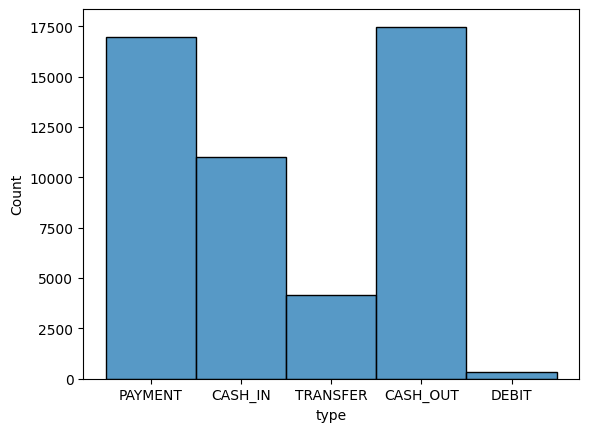

In [ ]:
sns.histplot(x=df['type'])



*   จากข้อมูลพบว่า ประเภทธุรกรรมส่วนใหญ่ในชุดข้อมูลนี้จะเป็นประเภท CASH_OUT = 17,480 ธุรกรรม และ PAYMENT = 16,974 ธุรกรรม โดยธุรกรรมที่มีน้อยที่สุดจะเป็นประเภท DEBIT = 355 ธุรกรรม


### 3. amount

In [ ]:
df['amount'].describe().round()

count       50000.0
mean       179762.0
std        575667.0
min             0.0
25%         13189.0
50%         74667.0
75%        208850.0
max      38143988.0
Name: amount, dtype: float64

In [ ]:
df[df['amount'] < 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
5828,10,PAYMENT,0.89,C1372921904,197387.1,197386.21,M898689878,0.0,0.0,0
30270,162,PAYMENT,0.27,C566415934,184.0,183.73,M499915734,0.0,0.0,0
41162,667,PAYMENT,0.26,C909065779,60035.0,60034.74,M352743909,0.0,0.0,0


<Axes: ylabel='amount'>

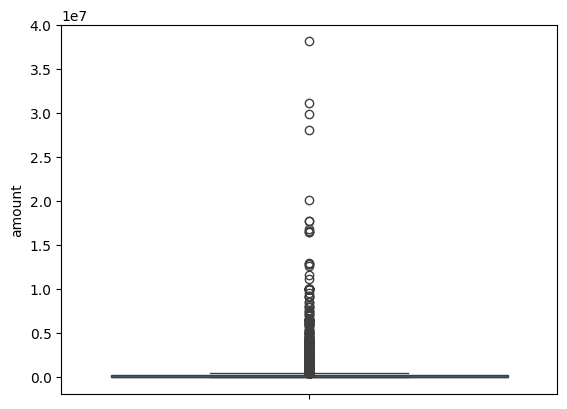

In [ ]:
sns.boxplot(y=df['amount'])



*   จากข้อมูลพบว่า มีข้อมูลที่มีค่าต่ำสุดเท่ากับ 0 ซึ่งดูมีความผิดปกติ จึงทำสำรวจเพิ่มเติมและพบว่า ที่จริงแล้วข้อมูลไม่ได้ค่าเท่ากับ 0 แต่เนื่องจากใช้ฟังก์ชั่น round() เพื่อให้ง่ายต่อการสำรวจนั้น ไปทำการปรับค่าให้เป็นจำนวนเต็ม จึงทำให้แสดงเป็นค่า 0

*   นอกจากนี้ยังพบว่า ยอดเงินในธุรกรรมจะมีจำนวนเงินประมาณ 179,762 โดยเฉลี่ย ซึ่งจากการสังเกตที่ค่า Standard deviation พบว่า แต่ละข้อมูลมีความแตกต่างกันค่อนข้างมาก





### 4. nameOrig

In [ ]:
df['nameOrig'].describe(include=True)

count          50000
unique         50000
top       C955292810
freq               1
Name: nameOrig, dtype: object



*   จากข้อมูลพบว่า ผู้ที่เป็นผู้เริ่มต้นทำธุรกรรมทั้งหมดในชุดข้อมูลนี้จะไม่ใช่คนๆ เดียวกัน เนื่องจากแต่ละคนจะมีเพียง 1 ธุรกรรมเท่านั้น



### 5. oldbalanceOrg

In [ ]:
df['oldbalanceOrg'].describe().round()

count       50000.0
mean       834383.0
std       2893075.0
min             0.0
25%             0.0
50%         13760.0
75%        105148.0
max      33222945.0
Name: oldbalanceOrg, dtype: float64

<Axes: ylabel='oldbalanceOrg'>

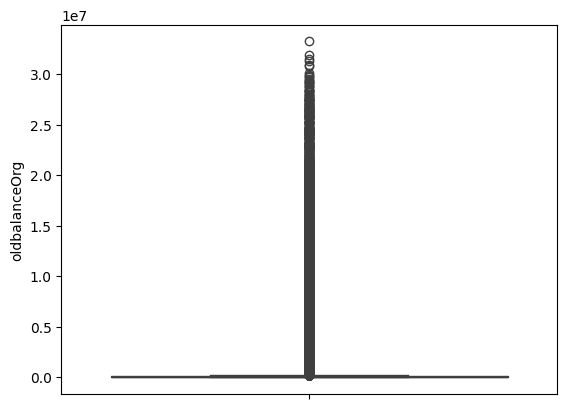

In [ ]:
sns.boxplot(y=df['oldbalanceOrg'])

*  จากข้อมูลพบว่า ยอดเงินคงเหลือก่อนทำธุรกรรมที่ต้นทาง จะมีค่าต่ำสุดอยู่ที่ประมาณ 0 และสูงสุดที่ประมาณ 33,222,945

### 6. newbalanceOrig

In [ ]:
df['newbalanceOrig'].describe().round()

count       50000.0
mean       854840.0
std       2926017.0
min             0.0
25%             0.0
50%             0.0
75%        137178.0
max      33829820.0
Name: newbalanceOrig, dtype: float64

<Axes: ylabel='newbalanceOrig'>

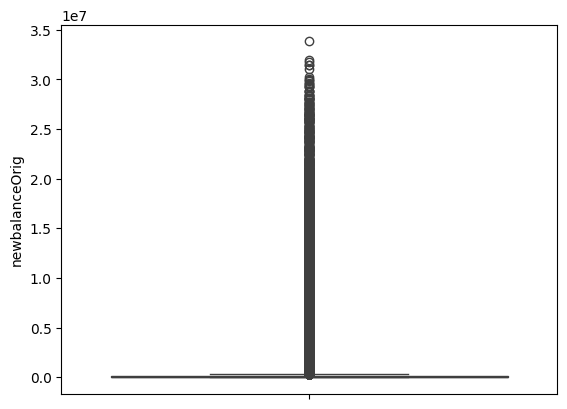

In [ ]:
sns.boxplot(y=df['newbalanceOrig'])

*  จากข้อมูลพบว่า ยอดเงินคงเหลือหลังทำธุรกรรมที่ต้นทาง จะมีค่าต่ำสุดอยู่ที่ประมาณ 0 และสูงสุดที่ประมาณ 33,829,820

### 7. nameDest

In [ ]:
df['nameDest'].describe(include=True)

count           50000
unique          47997
top       C1743996658
freq                4
Name: nameDest, dtype: object

*   จากข้อมูลพบว่า ผู้ที่เป็นผู้รับปลายทางในธุรกรรมจะมีโอกาสที่จะเป็นคนๆ เดียวกัน โดยจะมีจำนวนธุรกรรมสูงสุดอยู่ที่ 4 ธุรกรรม


### 8. oldbalanceDest

In [ ]:
df['oldbalanceDest'].describe().round()

count        50000.0
mean       1114855.0
std        3499099.0
min              0.0
25%              0.0
50%         133438.0
75%         949558.0
max      255168049.0
Name: oldbalanceDest, dtype: float64

<Axes: ylabel='oldbalanceDest'>

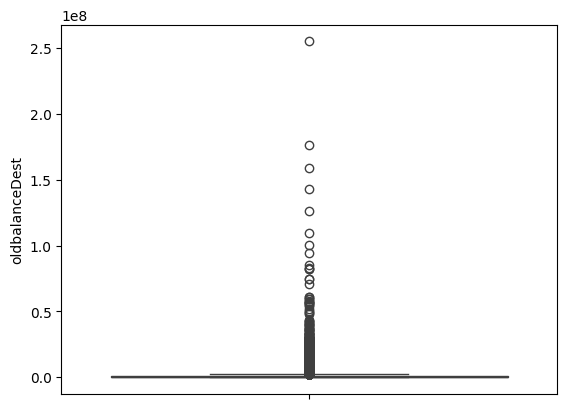

In [ ]:
sns.boxplot(y=df['oldbalanceDest'])

*  จากข้อมูลพบว่า ยอดคงเหลือเริ่มต้นของผู้รับก่อนการทำธุรกรรม จะมีค่าต่ำสุดอยู่ที่ประมาณ 0 และสูงสุดที่ประมาณ 255,168,049

### 9. newbalanceDest

In [ ]:
df['newbalanceDest'].describe().round()

count        50000.0
mean       1238147.0
std        3736889.0
min              0.0
25%              0.0
50%         219413.0
75%        1115778.0
max      257283335.0
Name: newbalanceDest, dtype: float64

<Axes: ylabel='newbalanceDest'>

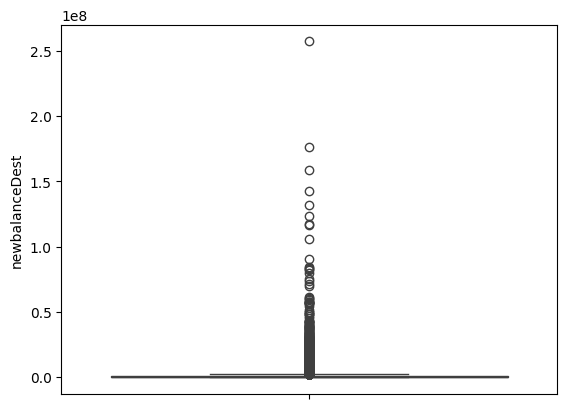

In [ ]:
sns.boxplot(y=df['newbalanceDest'])

*  จากข้อมูลพบว่า ยอดคงเหลือเริ่มต้นของผู้รับหลังการทำธุรกรรม จะมีค่าต่ำสุดอยู่ที่ประมาณ 0 และสูงสุดที่ประมาณ 257,283,335

### 10. isFraud

In [ ]:
df['isFraud'].value_counts()

isFraud
0    49935
1       65
Name: count, dtype: int64

In [ ]:
df['isFraud'].value_counts(normalize=True)

isFraud
0    0.9987
1    0.0013
Name: proportion, dtype: float64

<Axes: xlabel='isFraud', ylabel='Count'>

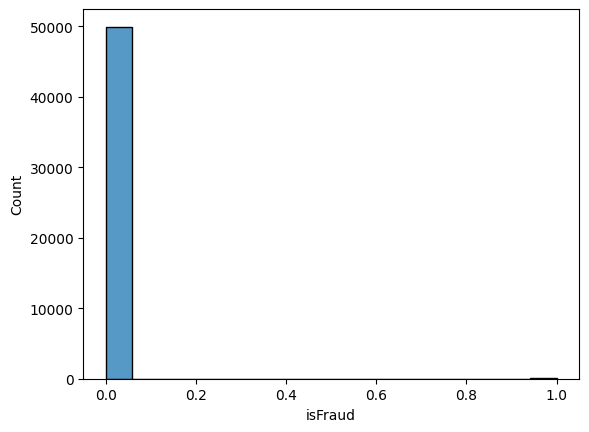

In [ ]:
sns.histplot(data=df, x='isFraud')

*  จากข้อมูลพบว่า จำนวนข้อมูลที่เป็นการฉ้อโกงหรือ Fraud มีสัดส่วนประมาณ 0.0013 จากจำนวนข้อมูลทั้งหมด หรือคิดเป็น 0.13%

### **EDA Question1: ธุรรรมประเภทใดที่จะมีจำนวน Fraud มากที่สุด**

In [ ]:
df.query('isFraud == 1')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
110,185,TRANSFER,489111.71,C725816726,489111.71,0.0,C347075851,0.00,0.00,1
3104,217,TRANSFER,3452538.75,C937580010,3452538.75,0.0,C1096456296,0.00,0.00,1
3145,177,TRANSFER,68536.24,C1139422478,68536.24,0.0,C248138217,0.00,0.00,1
3551,315,TRANSFER,5863.97,C108249800,5863.97,0.0,C898806761,0.00,0.00,1
4947,245,TRANSFER,124311.57,C318078280,124311.57,0.0,C571016162,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
47701,369,TRANSFER,231978.48,C202278158,231978.48,0.0,C988859148,0.00,0.00,1
48828,28,CASH_OUT,491517.77,C1198658385,491517.77,0.0,C523126423,518777.34,1010295.11,1
49337,632,TRANSFER,480404.03,C1962729026,480404.03,0.0,C1853051693,0.00,0.00,1
49436,128,TRANSFER,4483868.79,C1664723459,4483868.79,0.0,C366674827,0.00,0.00,1


In [ ]:
df.query('isFraud == 1').type.value_counts()

type
CASH_OUT    34
TRANSFER    31
Name: count, dtype: int64

* จากข้อมูลพบว่า ประเภทธุรกรรมที่จะเกิด Fraud มากที่สุดจะเป็นธุรกรรมประเภท CASH_OUT และ TRANSFER ตามลำดับ

### **EDA Question2: ธุรกรรมที่เป็น Fraud ส่วนใหญ่แล้ว จะมีจำนวณเงินอยู่ในช่วงระหว่างเท่าใด**

In [ ]:
# Filter data
fraud_amt = df[df['isFraud'] == 1][['isFraud','amount']]
fraud_amt

,isFraud,amount
110,1,489111.71
3104,1,3452538.75
3145,1,68536.24
3551,1,5863.97
4947,1,124311.57
...,...,...
47701,1,231978.48
48828,1,491517.77
49337,1,480404.03
49436,1,4483868.79


In [ ]:
# observe value
fraud_amt.describe().round()

,isFraud,amount
count,65.0,65.0
mean,1.0,2213558.0
std,0.0,3130966.0
min,1.0,5864.0
25%,1.0,146061.0
50%,1.0,588173.0
75%,1.0,2558618.0
max,1.0,10000000.0


In [ ]:
# Assign discrete value to segment amount into 4 range

# Define conditions
conditions = [
    (fraud_amt['amount'] < 2500000),
    (fraud_amt['amount'] >= 2500000) & (fraud_amt['amount'] < 5000000),
    (fraud_amt['amount'] >= 5000000) & (fraud_amt['amount'] < 7500000),
    (fraud_amt['amount'] >= 7500000)
]

# Define results
results = ['range_1', 'range_2', 'range_3', 'range_4']

# Create new column based on conditions in column1 and column2
fraud_amt['class'] = np.select(conditions, results)

print(fraud_amt)

       isFraud      amount    class
110          1   489111.71  range_1
3104         1  3452538.75  range_2
3145         1    68536.24  range_1
3551         1     5863.97  range_1
4947         1   124311.57  range_1
...        ...         ...      ...
47701        1   231978.48  range_1
48828        1   491517.77  range_1
49337        1   480404.03  range_1
49436        1  4483868.79  range_2
49614        1   182739.36  range_1

[65 rows x 3 columns]


In [ ]:
fraud_amt['class'].value_counts()

class
range_1    47
range_2     8
range_4     8
range_3     2
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='Count'>

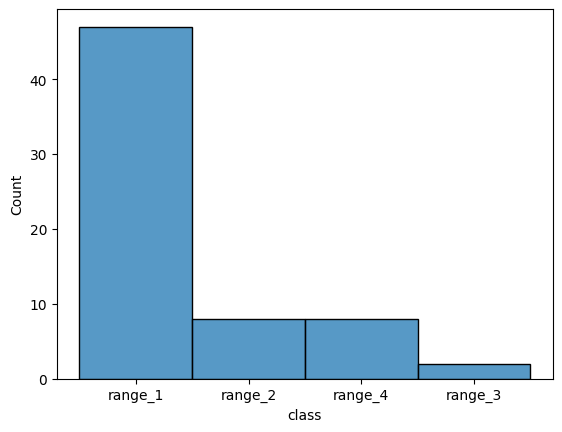

In [ ]:
sns.histplot(fraud_amt['class'])

* จากข้อมูลพบว่า ธุรกรรมที่มีจำนวนในการเกิด Fraud มากที่สุด จะเป็นธุรกรรมที่มีจำนวนเงินอยู่ในช่วง 0  ถึง 2,500,000 บาท

# Data Pre-processing

เนื่องจากในชุดข้อมูลนี้มีข้อมูลที่เป็น Categorical values อยู่ 1 คอลัมน์ ซึ่งก็คือคอลัมน์ type จึงจะทำการ Encoding data ก่อน โดยใช้วิธี One-hot encoding จากนั้นจึงจะทำการ Split data ในขั้นตอนถัดไป

In [ ]:
# Show unique value of type's column
print(df['type'].unique())

['PAYMENT' 'CASH_IN' 'TRANSFER' 'CASH_OUT' 'DEBIT']


In [ ]:
# Encoding data
encode_value = ['PAYMENT', 'CASH_OUT', 'TRANSFER', 'CASH_IN', 'DEBIT']

enc = OneHotEncoder(categories=[encode_value])
enc.fit(df[['type']])
df[['payment', 'cash_out', 'transfer', 'cash_in', 'debit']] = pd.DataFrame(enc.transform(df[['type']]).toarray(),dtype='int64')

In [ ]:
# Observe result after encoding
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,payment,cash_out,transfer,cash_in,debit
0,187,PAYMENT,5673.88,C955292810,9902.00,4228.12,M1266361357,0.00,0.00,0,1,0,0,0,0
1,328,PAYMENT,20372.51,C1477490740,16926.00,0.00,M798805815,0.00,0.00,0,1,0,0,0,0
2,140,CASH_IN,78144.73,C91238610,1276839.82,1354984.54,C318937330,11416917.70,11338772.98,0,0,0,0,1,0
3,167,TRANSFER,117473.22,C590428987,0.00,0.00,C772973446,246796.45,364269.67,0,0,0,1,0,0
4,303,CASH_OUT,216352.97,C785349288,168392.00,0.00,C1292864233,0.00,216352.97,0,0,1,0,0,0
5,399,CASH_OUT,127602.88,C1441189668,125466.00,0.00,C743349272,36849.77,164452.65,0,0,1,0,0,0
6,235,CASH_IN,124256.20,C1784187824,1604538.05,1728794.25,C1293763768,813592.41,689336.21,0,0,0,0,1,0
7,299,CASH_IN,103666.92,C2046646910,29862.00,133528.92,C401376472,0.00,0.00,0,0,0,0,1,0
8,309,CASH_IN,2522.72,C212675646,5025.00,7547.72,C1176593869,490817.70,488294.99,0,0,0,0,1,0
9,235,PAYMENT,15181.25,C543829242,0.00,0.00,M846584311,0.00,0.00,0,1,0,0,0,0


# Splitting Data

In [ ]:
# Define X, y variables
X = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest', 'payment', 'cash_out', 'transfer', 'cash_in', 'debit']]
y = df['isFraud']

In [ ]:
# Split data into 3 sets (train set, validate set, and test set) before learning

# Split train and test&validate
X_train, X_tv, y_train, y_tv = train_test_split(X, y, stratify=y, random_state=seed)

# Split test and validate
X_test, X_val, y_test, y_val = train_test_split(X_tv, y_tv, stratify=y_tv, test_size=0.5, random_state=seed)

In [ ]:
# Observe shape of data in each set
print(' X_train:',X_train.shape, '\n',
      'X_val:',X_val.shape, '\n',
      'X_test:',X_test.shape, '\n',
      'y_train:',y_train.shape, '\n',
      'y_val:',y_val.shape, '\n',
      'y_test:',y_test.shape)

 X_train: (37500, 11) 
 X_val: (6250, 11) 
 X_test: (6250, 11) 
 y_train: (37500,) 
 y_val: (6250,) 
 y_test: (6250,)


In [ ]:
# Observe amount of each value in y both train set and test set
print(' y_train:',y_train.value_counts(), '\n',
      'y_val:',y_val.value_counts(), '\n',
      'y_test:',y_test.value_counts())

 y_train: isFraud
0    37451
1       49
Name: count, dtype: int64 
 y_val: isFraud
0    6242
1       8
Name: count, dtype: int64 
 y_test: isFraud
0    6242
1       8
Name: count, dtype: int64


# Imbalanced Data

* ในการประเมินประสิทธิภาพของแต่ละเทคนิคที่ใช้ในการแก้ไขปัญหา Imbalanced data จะใช้โมเดล Random Forest Classifier มาเป็นโมเดลในการประเมิน โดยจะนำมาใช้ร่วมกับการทำ Cross-validation และนำค่า Metric scores ของ Valiadation ที่ได้แต่ละตัวมาใช้ในการประเมิน

## Original Data Before Imbalanced Handling

In [ ]:
# Proceed cross-validation
scores = cross_validate(RandomForestClassifier(n_estimators=100, random_state=seed),
                        X_train,
                        y_train,
                        cv=10,
                        scoring=('recall', 'f1', 'accuracy', 'precision', 'roc_auc', 'average_precision'))

# Create dataframe
imbalance_score = pd.DataFrame(columns=['recall', 'f1', 'accuracy', 'precision', 'roc_auc','average_precision'],
                               index=['original', 'undersampling', 'oversampling', 'smote'])

# Append score into Pandas Dataframe
imbalance_score.loc['original'] = scores['test_recall'].mean(), scores['test_f1'].mean(), \
                                scores['test_accuracy'].mean(), scores['test_precision'].mean(), \
                                scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

# Show result
imbalance_score

,recall,f1,accuracy,precision,roc_auc,average_precision
original,0.665,0.765,0.999573,1.0,0.92532,0.771214
undersampling,NaN,NaN,NaN,NaN,NaN,NaN
oversampling,NaN,NaN,NaN,NaN,NaN,NaN
smote,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Random Undersampling

In [ ]:
# Crate random undersampling dataset
rus = RandomUnderSampler(replacement=False, random_state=seed)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Show shape of X and y
print(X_train.shape)
print(X_train_under.shape)
print(np.bincount(y_train))
print(np.bincount(y_train_under))

(37500, 11)
(98, 11)
[37451    49]
[49 49]


In [ ]:
# Create pipeline
undersample_pipe = make_imb_pipeline(RandomUnderSampler(random_state=seed),
                                     RandomForestClassifier(n_estimators=100, random_state=seed))

# Proceed cross-validation
scores = cross_validate(undersample_pipe,
                        X_train,
                        y_train,
                        cv=10,
                        scoring=('recall', 'f1', 'accuracy', 'precision', 'roc_auc', 'average_precision'))

# Append score into Pandas Dataframe
imbalance_score.loc['undersampling'] = scores['test_recall'].mean(), scores['test_f1'].mean(), \
                                scores['test_accuracy'].mean(), scores['test_precision'].mean(), \
                                scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

# Show result
imbalance_score

,recall,f1,accuracy,precision,roc_auc,average_precision
original,0.665,0.765,0.999573,1.0,0.92532,0.771214
undersampling,0.94,0.032854,0.925573,0.016734,0.984032,0.579162
oversampling,NaN,NaN,NaN,NaN,NaN,NaN
smote,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Random Oversampling

In [ ]:
# Crate random oversampling dataset
ros = RandomOverSampler()
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# Show shape of X and y
print(X_train.shape)
print(X_train_over.shape)
print(np.bincount(y_train))
print(np.bincount(y_train_over))

(37500, 11)
(74902, 11)
[37451    49]
[37451 37451]


In [ ]:
# Create pipeline
oversample_pipe = make_imb_pipeline(RandomOverSampler(random_state=seed),
                                    RandomForestClassifier(n_estimators=100, random_state=seed))

# Proceed cross-validation
scores = cross_validate(oversample_pipe,
                        X_train,
                        y_train,
                        cv=10,
                        scoring=('recall', 'f1', 'accuracy', 'precision', 'roc_auc', 'average_precision'))

# Append score into Pandas Dataframe
imbalance_score.loc['oversampling'] = scores['test_recall'].mean(), scores['test_f1'].mean(), \
                                scores['test_accuracy'].mean(), scores['test_precision'].mean(), \
                                scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

# Show result
imbalance_score

,recall,f1,accuracy,precision,roc_auc,average_precision
original,0.665,0.765,0.999573,1.0,0.92532,0.771214
undersampling,0.94,0.032854,0.925573,0.016734,0.984032,0.579162
oversampling,0.585,0.701508,0.999467,1.0,0.94847,0.774611
smote,NaN,NaN,NaN,NaN,NaN,NaN


## 3. SMOTE

In [ ]:
# Crate SMOTE dataset
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Show shape of X and y
print(X_train.shape)
print(X_train_smote.shape)
print(np.bincount(y_train))
print(np.bincount(y_train_smote))

(37500, 11)
(74902, 11)
[37451    49]
[37451 37451]


In [ ]:
# Find the best K value of SMOTE by using GridSearchCV
smote_pipe = make_imb_pipeline(SMOTE(random_state=seed),
                               RandomForestClassifier(n_estimators=100, random_state=seed))

param_grid = {'smote__k_neighbors': [3, 5, 7, 9]}

im_grid = GridSearchCV(smote_pipe, param_grid, cv=10, return_train_score=True, scoring="average_precision")
im_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=55)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=55))]),
             param_grid={'smote__k_neighbors': [3, 5, 7, 9]},
             return_train_score=True, scoring='average_precision')

In [ ]:
# Obser best K value and best validate score
print(im_grid.best_params_)
print(im_grid.best_score_)

{'smote__k_neighbors': 9}
0.7256148652014527


In [ ]:
# Create pipeline
smote_pipe = make_imb_pipeline(SMOTE(k_neighbors=im_grid.best_params_['smote__k_neighbors'], random_state=seed),
                                RandomForestClassifier(n_estimators=100, random_state=seed))

# Proceed cross-validation
scores = cross_validate(smote_pipe,
                        X_train,
                        y_train,
                        cv=10,
                        scoring=('recall', 'f1', 'accuracy', 'precision', 'roc_auc', 'average_precision'))

# Append score into Pandas Dataframe
imbalance_score.loc['smote'] = scores['test_recall'].mean(), scores['test_f1'].mean(), \
                                scores['test_accuracy'].mean(), scores['test_precision'].mean(), \
                                scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

# Show result
imbalance_score

,recall,f1,accuracy,precision,roc_auc,average_precision
original,0.665,0.765,0.999573,1.0,0.92532,0.771214
undersampling,0.94,0.032854,0.925573,0.016734,0.984032,0.579162
oversampling,0.585,0.701508,0.999467,1.0,0.94847,0.774611
smote,0.73,0.502036,0.997973,0.394371,0.998329,0.725615


## Evaluation  (Question1)

In [ ]:
# show score of each technique
imbalance_score

,recall,f1,accuracy,precision,roc_auc,average_precision
original,0.665,0.765,0.999573,1.0,0.92532,0.771214
undersampling,0.94,0.032854,0.925573,0.016734,0.984032,0.579162
oversampling,0.585,0.701508,0.999467,1.0,0.94847,0.774611
smote,0.73,0.502036,0.997973,0.394371,0.998329,0.725615


* เนื่องจากในการประเมินประสิทธิภาพของชุดข้อมูลที่มีปัญหา Imbalanced จะไม่สามารถใช้ค่า Accuracy ในการประเมินประสิทธิภาพได้ เนื่องจากถ้าหากโมเดลทำการทำนายข้อมูลที่เป็นกลุ่ม Positive (Minority class) ถูกเพียง 1 ครั้ง จะทำให้ค่า Accuracy นั้นสูงมาก ซึ่งไม่ได้สะท้อนความสามารถของโมเดลได้อย่างแท้จริง ดังนั้นจะทำการใช้ Metrics อื่น มาใช้ในการประเมินแทน

* จากผลลัพธ์ที่แสดงข้างต้นพบว่า ทุกเทคนิคมีค่า roc_auc ค่อนข้างสูงและมีค่าใกล้เคียงกัน ส่วนค่า Average Precision จะพบว่า เทคนิค Random Undersampling มีค่าน้อยที่สุด โดยถัดไปจะขออภิปรายผลลัพท์ของค่าอื่นๆ ในแต่ละเทคนิคตามรายละเอียดด้านล่างนี้

    1. เทคนิค Random Undersampling: <br> มีค่า F1-score และ Precision ที่ต่ำมาก แต่มีค่า Recall ที่สูงที่สุดเมื่อเทียบกับเทคนิคอื่นๆ

    2. เทคนิค Random Oversampling: <br> มีค่า F1-score และ Precision ที่สูงมาก และมีค่า Recall ปานกลาง ซึ่งมีค่าน้อยกว่าเทคนิคอื่นๆ

    3. เทคนิค SMOTE: <br> มีค่า F1-score ปานกลาง และ Precision ที่ค่อนข้างน้อย แต่มีค่า Recall ที่ค่อนข้างสูง โดยสูงรองลงมาจากเทคนิค  Random Undersampling

* โดยจากข้อมูลทั้งหมดจะพบว่า เทคนิค Random Undersampling และ  SMOTE น่าจะเป็นเทคนิคที่เหมาะสำหรับการใช้งานโปรเจคนี้ เนื่องจากมีความสามารถในการทำนายกลุ่ม Positive จากกลุ่ม Positive ทั้งหมดได้ดี หรือสามารถทำนายธุรกิจกรรมที่เป็น Fraud จากข้อมูลธุรกรรม  Fraud ทั้งหมดได้มาก ซึ่งสังเกตได้จากค่า Recall ที่สูง

* แต่ถ้าสังเกตจากค่า Precision แล้วจะพบว่า เทคนิค Random Undersampling มีค่า Precision ที่ต่ำมากแสดงถึง ความสามารถในทำนายกลุ่ม Positive ได้ถูกต้อง จากการทำนายว่าเป็นกลุ่ม Positive ทั้งหมดนั้นน้อยมาก

* ส่วนเทคนิค Random Oversampling นั้นก็น่าจะสามารถนำมาใช้งานได้ เนื่องจากมีค่า Recall ที่ระดับปานกลาง รวมถึงค่า Precision ที่ค่อนข้างสูง จึงคาดว่าน่าจะมีประสิทธิภาพที่ดีในระดับนึง

* โดยถ้ามองจากภาพรวมแล้ว จึงสรุปได้ว่า เทคนิคที่น่าจะมีประสิทธิภาพดีและเหมาะสมกับชุดข้อมูลนี้จะเป็น เทคนิค Random Oversampling และเทคนิค SMOTE

# Feature Selection: Using Permutation Feature Importance Method

## Logistic Regression

### Random Undersampling

feature name: step = 0.002176
feature name: amount = -0.0024639999999999775
feature name: oldbalanceOrg = 0.02230399999999999
feature name: newbalanceOrig = -0.007167999999999996
feature name: oldbalanceDest = 0.013216000000000006
feature name: newbalanceDest = 0.00025600000000001175
feature name: payment = -0.06332800000000001
feature name: cash_out = -0.097504
feature name: transfer = -0.03993600000000001
feature name: cash_in = -0.025439999999999973
feature name: debit = 0.0


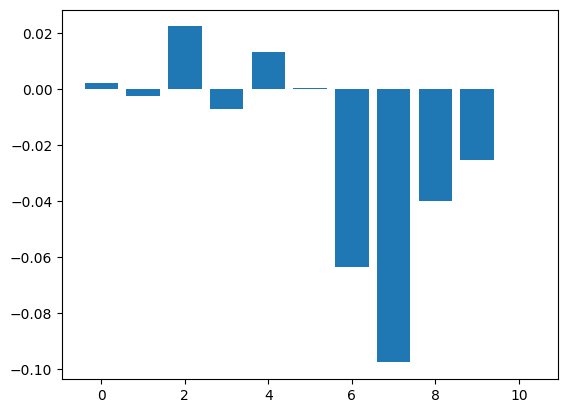

In [ ]:
# Create pipeline
fs_lg_under = Pipeline([('scale', StandardScaler()), ('logistic', LogisticRegression(random_state=seed))])

# Fit model
fs_lg_under.fit(X_train_under, y_train_under)

# Scoring validation before proceed feature selection
org_val_score = fs_lg_under.score(X_val, y_val)

# Feature Selection
result = permutation_importance(fs_lg_under, X_val, y_val, scoring='accuracy', random_state=seed)

# Get importance
importance = result.importances_mean

# Show result of each feature
for i in range(len(importance)):
    print(f'feature name: {X_train.columns[i]} = {importance[i]}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# show only importance feature
new_feature_lg_under  = []

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] > 0:

        new_feature_lg_under.append(X_train.columns[i])

        print(f"  {X_train.columns[i]}"
              f"  {result.importances_mean[i]:.4f}"
              f" +/- {result.importances_std[i]:.4f}")

  oldbalanceOrg  0.0223 +/- 0.0020
  oldbalanceDest  0.0132 +/- 0.0031
  step  0.0022 +/- 0.0027
  newbalanceDest  0.0003 +/- 0.0022


In [ ]:
# Observe new feature value
print(new_feature_lg_under)

['oldbalanceOrg', 'oldbalanceDest', 'step', 'newbalanceDest']


In [ ]:
# Remove feature that is not importance
X_train_lg_under = X_train_under.loc[:,new_feature_lg_under]
X_val_lg_under = X_val.loc[:,new_feature_lg_under]

# Observe new shape
print(f'original shape: {X_train_under.shape}')
print(f'new shape of train data: {X_train_lg_under.shape}\n')

print(f'original shape: {X_val.shape}')
print(f'new shape of validation data: {X_val_lg_under.shape}\n')

original shape: (98, 11)
new shape of train data: (98, 4)

original shape: (6250, 11)
new shape of validation data: (6250, 4)



In [ ]:
# Evalute after feature selection

# Create pipeline
fs_lg_under = Pipeline([('scale', StandardScaler()), ('logistic', LogisticRegression(random_state=seed))])

# Fit model
fs_lg_under.fit(X_train_lg_under, y_train_under)

# Create dataframe
fs_score = pd.DataFrame(columns=['org_logistic', 'selected_logistic',
                                    'org_svm', 'selected_svm',
                                    'org_boosting', 'selected_boosting',
                                    ],
                            index=['undersampling', 'oversampling', 'smote'])

# Append score into Pandas Dataframe
fs_score.iloc[0,0] = org_val_score
fs_score.iloc[0,1] = fs_lg_under.score(X_val_lg_under, y_val)

fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,NaN,NaN,NaN,NaN
oversampling,NaN,NaN,NaN,NaN,NaN,NaN
smote,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pca_score = pd.DataFrame(columns=['org_logistic', 'pca_logistic',
                                    'org_svm', 'pca_svm',
                                    'org_boosting', 'pca_boosting',
                                    ],
                            index=['undersampling', 'oversampling', 'smote'])

pca_score.iloc[0,0] = org_val_score

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,NaN,NaN,NaN,NaN,NaN
oversampling,NaN,NaN,NaN,NaN,NaN,NaN
smote,NaN,NaN,NaN,NaN,NaN,NaN


### Random Oversampling

feature name: step = -0.0020480000000000498
feature name: amount = -0.0001920000000000588
feature name: oldbalanceOrg = 0.12579199999999996
feature name: newbalanceOrig = 0.10425599999999997
feature name: oldbalanceDest = 0.12284799999999996
feature name: newbalanceDest = 0.21136
feature name: payment = -0.016032000000000025
feature name: cash_out = -0.012064000000000009
feature name: transfer = 0.010239999999999982
feature name: cash_in = -0.010880000000000046
feature name: debit = -0.0003200000000000092


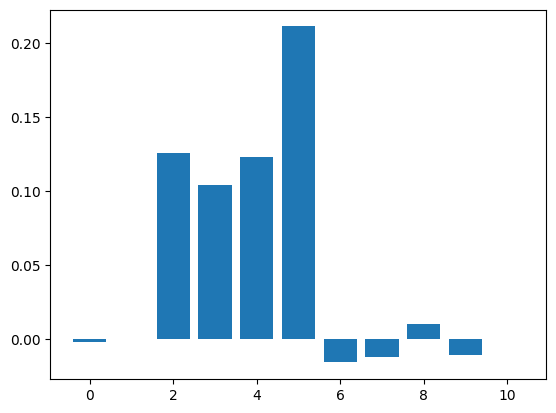

In [ ]:
# Create pipeline
fs_lg_over = Pipeline([('scale', StandardScaler()), ('logistic', LogisticRegression(random_state=seed,max_iter=1000))])

# Fit model
fs_lg_over.fit(X_train_over, y_train_over)

# Scoring validation before proceed feature selection
org_val_score = fs_lg_over.score(X_val, y_val)

# Feature Selection
result = permutation_importance(fs_lg_over, X_val, y_val, scoring='accuracy', random_state=seed)

# Get importance
importance = result.importances_mean

# Show result of each feature
for i in range(len(importance)):
    print(f'feature name: {X_train.columns[i]} = {importance[i]}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# show only importance feature
new_feature_lg_over  = []

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] > 0:

        new_feature_lg_over.append(X_train.columns[i])

        print(f"  {X_train.columns[i]}"
              f"  {result.importances_mean[i]:.4f}"
              f" +/- {result.importances_std[i]:.4f}")

  newbalanceDest  0.2114 +/- 0.0011
  oldbalanceOrg  0.1258 +/- 0.0007
  oldbalanceDest  0.1228 +/- 0.0033
  newbalanceOrig  0.1043 +/- 0.0017
  transfer  0.0102 +/- 0.0023


In [ ]:
# Observe new feature value
print(new_feature_lg_over)

['newbalanceDest', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceOrig', 'transfer']


In [ ]:
# Remove feature that is not importance
X_train_lg_over = X_train_over.loc[:,new_feature_lg_over]
X_val_lg_over = X_val.loc[:,new_feature_lg_over]

# Observe new shape
print(f'original shape: {X_train_over.shape}')
print(f'new shape of train data: {X_train_lg_over.shape}\n')

print(f'original shape: {X_val.shape}')
print(f'new shape of validation data: {X_val_lg_over.shape}\n')

original shape: (74902, 11)
new shape of train data: (74902, 5)

original shape: (6250, 11)
new shape of validation data: (6250, 5)



In [ ]:
# Evalute after feature selection

# Create pipeline
fs_lg_over = Pipeline([('scale', StandardScaler()), ('logistic', LogisticRegression(random_state=seed))])

# Fit model
fs_lg_over.fit(X_train_lg_over, y_train_over)

# Append score into Pandas Dataframe
fs_score.iloc[1,0] = org_val_score
fs_score.iloc[1,1] = fs_lg_over.score(X_val_lg_over, y_val)

fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,NaN,NaN,NaN,NaN
oversampling,0.95168,0.9712,NaN,NaN,NaN,NaN
smote,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pca_score.iloc[1,0] = org_val_score

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,NaN,NaN,NaN,NaN,NaN
oversampling,0.95168,NaN,NaN,NaN,NaN,NaN
smote,NaN,NaN,NaN,NaN,NaN,NaN


### SMOTE

feature name: step = -0.0014079999999999427
feature name: amount = 0.0005440000000000334
feature name: oldbalanceOrg = 0.13068800000000003
feature name: newbalanceOrig = 0.11635200000000001
feature name: oldbalanceDest = 0.11065600000000002
feature name: newbalanceDest = 0.18099200000000004
feature name: payment = 0.21712000000000004
feature name: cash_out = 0.20137600000000005
feature name: transfer = 0.043552000000000035
feature name: cash_in = 0.10278400000000003
feature name: debit = 0.006240000000000023


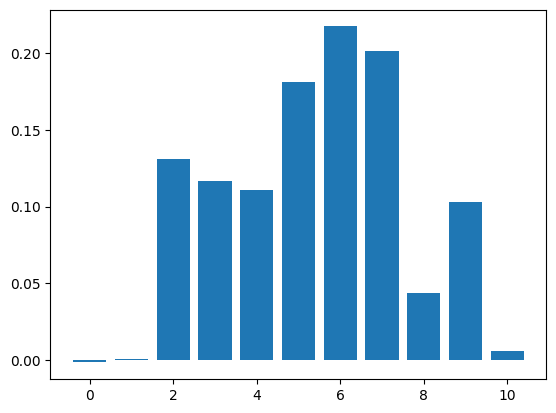

In [ ]:
# Create pipeline
fs_lg_smote = Pipeline([('scale', StandardScaler()), ('logistic', LogisticRegression(random_state=seed,max_iter=1000))])

# Fit model
fs_lg_smote.fit(X_train_smote, y_train_smote)

# Scoring validation before proceed feature selection
org_val_score = fs_lg_smote.score(X_val, y_val)

# Feature Selection
result = permutation_importance(fs_lg_smote, X_val, y_val, scoring='accuracy', random_state=seed)

# Get importance
importance = result.importances_mean

# Show result of each feature
for i in range(len(importance)):
    print(f'feature name: {X_train.columns[i]} = {importance[i]}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# show only importance feature
new_feature_lg_smote = []

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] > 0:

        new_feature_lg_smote.append(X_train.columns[i])

        print(f"  {X_train.columns[i]}"
              f"  {result.importances_mean[i]:.4f}"
              f" +/- {result.importances_std[i]:.4f}")

  payment  0.2171 +/- 0.0037
  cash_out  0.2014 +/- 0.0024
  newbalanceDest  0.1810 +/- 0.0023
  oldbalanceOrg  0.1307 +/- 0.0019
  newbalanceOrig  0.1164 +/- 0.0009
  oldbalanceDest  0.1107 +/- 0.0038
  cash_in  0.1028 +/- 0.0017
  transfer  0.0436 +/- 0.0013
  debit  0.0062 +/- 0.0001
  amount  0.0005 +/- 0.0011


In [ ]:
# Observe new feature value
print(new_feature_lg_smote)

['payment', 'cash_out', 'newbalanceDest', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'cash_in', 'transfer', 'debit', 'amount']


In [ ]:
# Remove feature that is not importance
X_train_lg_smote = X_train_smote.loc[:,new_feature_lg_smote]
X_val_lg_smote = X_val.loc[:,new_feature_lg_smote]

# Observe new shape
print(f'original shape: {X_train_smote.shape}')
print(f'new shape of train data: {X_train_lg_smote.shape}\n')

print(f'original shape: {X_val.shape}')
print(f'new shape of validation data: {X_val_lg_smote.shape}\n')

original shape: (74902, 11)
new shape of train data: (74902, 10)

original shape: (6250, 11)
new shape of validation data: (6250, 10)



In [ ]:
# Evalute after feature selection

# Create pipeline
fs_lg_smote = Pipeline([('scale', StandardScaler()), ('logistic', LogisticRegression(random_state=seed,max_iter=1000))])

# Fit model
fs_lg_smote.fit(X_train_lg_smote, y_train_smote)

# Append score into Pandas Dataframe
fs_score.iloc[2,0] = org_val_score
fs_score.iloc[2,1] = fs_lg_smote.score(X_val_lg_smote, y_val)

fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,NaN,NaN,NaN,NaN
oversampling,0.95168,0.9712,NaN,NaN,NaN,NaN
smote,0.97216,0.97552,NaN,NaN,NaN,NaN


In [ ]:
pca_score.iloc[2,0] = org_val_score

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,NaN,NaN,NaN,NaN,NaN
oversampling,0.95168,NaN,NaN,NaN,NaN,NaN
smote,0.97216,NaN,NaN,NaN,NaN,NaN


## Support Vector Machine (SVM)

### Random Undersampling

feature name: step = 0.001503999999999972
feature name: amount = -0.0011520000000000198
feature name: oldbalanceOrg = 0.005727999999999955
feature name: newbalanceOrig = -0.00636800000000004
feature name: oldbalanceDest = 0.02025599999999996
feature name: newbalanceDest = 0.001503999999999972
feature name: payment = 0.12883199999999997
feature name: cash_out = -0.051424000000000025
feature name: transfer = -0.019776000000000037
feature name: cash_in = 0.013983999999999951
feature name: debit = 0.0


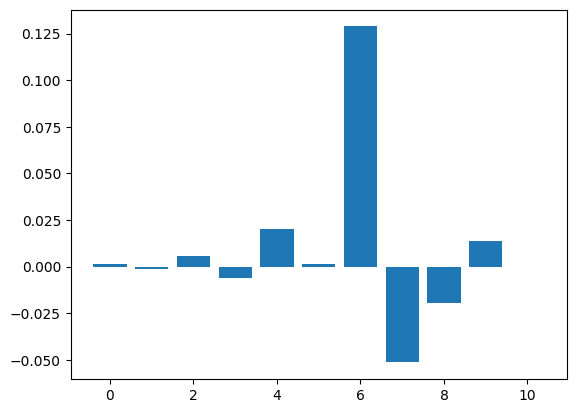

In [ ]:
# Create pipeline
fs_svm_under = Pipeline([('scale', StandardScaler()), ('svm', SVC(random_state=seed))])

# Fit model
fs_svm_under.fit(X_train_under, y_train_under)

# Scoring validation before proceed feature selection
org_val_score = fs_svm_under.score(X_val, y_val)

# Feature Selection
result = permutation_importance(fs_svm_under, X_val, y_val, scoring='accuracy', random_state=seed)

# Get importance
importance = result.importances_mean

# Show result of each feature
for i in range(len(importance)):
    print(f'feature name: {X_train.columns[i]} = {importance[i]}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# show only importance feature
new_feature_svm_under = []

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] > 0:

        new_feature_svm_under.append(X_train.columns[i])

        print(f"  {X_train.columns[i]}"
              f"  {result.importances_mean[i]:.4f}"
              f" +/- {result.importances_std[i]:.4f}")

  payment  0.1288 +/- 0.0025
  oldbalanceDest  0.0203 +/- 0.0029
  cash_in  0.0140 +/- 0.0018
  oldbalanceOrg  0.0057 +/- 0.0010
  newbalanceDest  0.0015 +/- 0.0016
  step  0.0015 +/- 0.0016


In [ ]:
# Observe new feature value
print(new_feature_svm_under)

['payment', 'oldbalanceDest', 'cash_in', 'oldbalanceOrg', 'newbalanceDest', 'step']


In [ ]:
# Remove feature that is not importance
X_train_svm_under = X_train_under.loc[:,new_feature_svm_under]
X_val_svm_under = X_val.loc[:,new_feature_svm_under]

# Observe new shape
print(f'original shape: {X_train_under.shape}')
print(f'new shape of train data: {X_train_svm_under.shape}\n')

print(f'original shape: {X_val.shape}')
print(f'new shape of validation data: {X_val_svm_under.shape}\n')

original shape: (98, 11)
new shape of train data: (98, 6)

original shape: (6250, 11)
new shape of validation data: (6250, 6)



In [ ]:
# Evalute after feature selection

# Create pipeline
fs_svm_under = Pipeline([('scale', StandardScaler()), ('svm', SVC(random_state=seed))])

# Fit model
fs_svm_under.fit(X_train_svm_under, y_train_under)

# Append score into Pandas Dataframe
fs_score.iloc[0,2] = org_val_score
fs_score.iloc[0,3] = fs_svm_under.score(X_val_svm_under, y_val)

fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,0.71744,0.71776,NaN,NaN
oversampling,0.95168,0.9712,NaN,NaN,NaN,NaN
smote,0.97216,0.97552,NaN,NaN,NaN,NaN


In [ ]:
pca_score.iloc[0,2] = org_val_score

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,NaN,0.71744,NaN,NaN,NaN
oversampling,0.95168,NaN,NaN,NaN,NaN,NaN
smote,0.97216,NaN,NaN,NaN,NaN,NaN


### Random Oversampling

feature name: step = -0.001216000000000017
feature name: amount = 0.0015359999999999818
feature name: oldbalanceOrg = 0.10985599999999993
feature name: newbalanceOrig = 0.08662399999999996
feature name: oldbalanceDest = 0.02255999999999996
feature name: newbalanceDest = 0.08659199999999996
feature name: payment = 0.061183999999999975
feature name: cash_out = -0.015488000000000057
feature name: transfer = -0.0035840000000000537
feature name: cash_in = -0.002752000000000021
feature name: debit = 6.399999999997518e-05


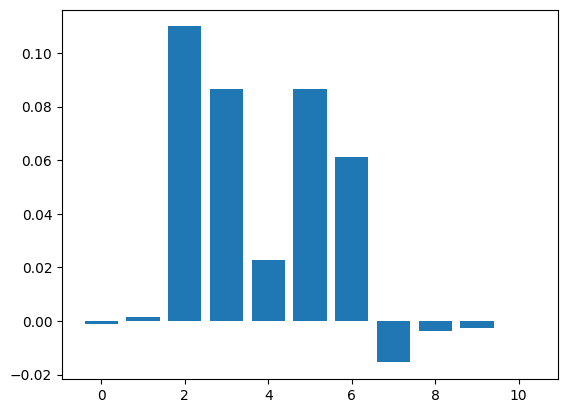

In [ ]:
# Create pipeline
fs_svm_over = Pipeline([('scale', StandardScaler()), ('svm', SVC(random_state=seed))])

# Fit model
fs_svm_over.fit(X_train_over, y_train_over)

# Scoring validation before proceed feature selection
org_val_score = fs_svm_over.score(X_val, y_val)

# Feature Selection
result = permutation_importance(fs_svm_over, X_val, y_val, scoring='accuracy', random_state=seed)

# Get importance
importance = result.importances_mean

# Show result of each feature
for i in range(len(importance)):
    print(f'feature name: {X_train.columns[i]} = {importance[i]}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# show only importance feature
new_feature_svm_over = []

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] > 0:

        new_feature_svm_over.append(X_train.columns[i])

        print(f"  {X_train.columns[i]}"
              f"  {result.importances_mean[i]:.4f}"
              f" +/- {result.importances_std[i]:.4f}")

  oldbalanceOrg  0.1099 +/- 0.0013
  newbalanceOrig  0.0866 +/- 0.0009
  newbalanceDest  0.0866 +/- 0.0021
  payment  0.0612 +/- 0.0012
  oldbalanceDest  0.0226 +/- 0.0020
  amount  0.0015 +/- 0.0007
  debit  0.0001 +/- 0.0002


In [ ]:
# Observe new feature value
print(new_feature_svm_over)

['oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest', 'payment', 'oldbalanceDest', 'amount', 'debit']


In [ ]:
# Remove feature that is not importance
X_train_svm_over = X_train_over.loc[:,new_feature_svm_over]
X_val_svm_over = X_val.loc[:,new_feature_svm_over]

# Observe new shape
print(f'original shape: {X_train_over.shape}')
print(f'new shape of train data: {X_train_svm_over.shape}\n')

print(f'original shape: {X_val.shape}')
print(f'new shape of validation data: {X_val_svm_over.shape}\n')

original shape: (74902, 11)
new shape of train data: (74902, 7)

original shape: (6250, 11)
new shape of validation data: (6250, 7)



In [ ]:
# Evalute after feature selection

# Create pipeline
fs_svm_over = Pipeline([('scale', StandardScaler()), ('svm', SVC(random_state=seed))])

# Fit model
fs_svm_over.fit(X_train_svm_over, y_train_over)

# Append score into Pandas Dataframe
fs_score.iloc[1,2] = org_val_score
fs_score.iloc[1,3] = fs_svm_over.score(X_val_svm_over, y_val)

fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,0.71744,0.71776,NaN,NaN
oversampling,0.95168,0.9712,0.96,0.9128,NaN,NaN
smote,0.97216,0.97552,NaN,NaN,NaN,NaN


In [ ]:
pca_score.iloc[1,2] = org_val_score

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,NaN,0.71744,NaN,NaN,NaN
oversampling,0.95168,NaN,0.96,NaN,NaN,NaN
smote,0.97216,NaN,NaN,NaN,NaN,NaN


### SMOTE

feature name: step = -0.00022400000000002417
feature name: amount = 0.002687999999999957
feature name: oldbalanceOrg = 0.11260799999999996
feature name: newbalanceOrig = 0.09276799999999996
feature name: oldbalanceDest = 0.0027839999999999645
feature name: newbalanceDest = 0.022751999999999994
feature name: payment = 0.21727999999999997
feature name: cash_out = 0.08556799999999998
feature name: transfer = 0.011583999999999973
feature name: cash_in = 0.05004799999999996
feature name: debit = 0.0036159999999999747


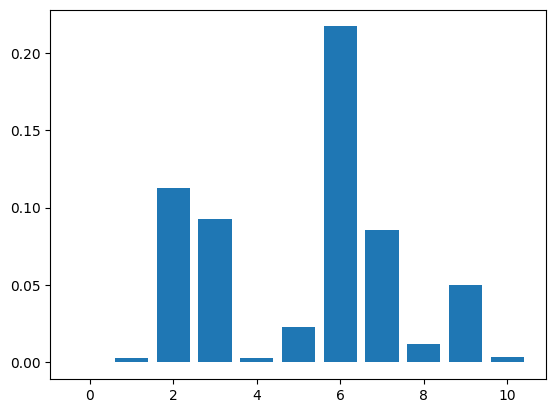

In [ ]:
# Create pipeline
fs_svm_smote = Pipeline([('scale', StandardScaler()), ('svm', SVC(random_state=seed))])

# Fit model
fs_svm_smote.fit(X_train_smote, y_train_smote)

# Scoring validation before proceed feature selection
org_val_score = fs_svm_smote.score(X_val, y_val)

# Feature Selection
result = permutation_importance(fs_svm_smote, X_val, y_val, scoring='accuracy', random_state=seed)

# Get importance
importance = result.importances_mean

# Show result of each feature
for i in range(len(importance)):
    print(f'feature name: {X_train.columns[i]} = {importance[i]}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# show only importance feature
new_feature_svm_smote = []

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] > 0:

        new_feature_svm_smote.append(X_train.columns[i])

        print(f"  {X_train.columns[i]}"
              f"  {result.importances_mean[i]:.4f}"
              f" +/- {result.importances_std[i]:.4f}")

  payment  0.2173 +/- 0.0035
  oldbalanceOrg  0.1126 +/- 0.0012
  newbalanceOrig  0.0928 +/- 0.0010
  cash_out  0.0856 +/- 0.0016
  cash_in  0.0500 +/- 0.0013
  newbalanceDest  0.0228 +/- 0.0013
  transfer  0.0116 +/- 0.0007
  debit  0.0036 +/- 0.0002
  oldbalanceDest  0.0028 +/- 0.0006
  amount  0.0027 +/- 0.0009


In [ ]:
# Observe new feature value
print(new_feature_svm_smote)

['payment', 'oldbalanceOrg', 'newbalanceOrig', 'cash_out', 'cash_in', 'newbalanceDest', 'transfer', 'debit', 'oldbalanceDest', 'amount']


In [ ]:
# Remove feature that is not importance
X_train_svm_smote = X_train_smote.loc[:,new_feature_svm_smote]
X_val_svm_smote = X_val.loc[:,new_feature_svm_smote]

# Observe new shape
print(f'original shape: {X_train_smote.shape}')
print(f'new shape of train data: {X_train_svm_smote.shape}\n')

print(f'original shape: {X_val.shape}')
print(f'new shape of validation data: {X_val_svm_smote.shape}\n')

original shape: (74902, 11)
new shape of train data: (74902, 10)

original shape: (6250, 11)
new shape of validation data: (6250, 10)



In [ ]:
# Evalute after feature selection

# Create pipeline
fs_svm_smote = Pipeline([('scale', StandardScaler()), ('svm', SVC(random_state=seed))])

# Fit model
fs_svm_smote.fit(X_train_svm_smote, y_train_smote)

# Append score into Pandas Dataframe
fs_score.iloc[2,2] = org_val_score
fs_score.iloc[2,3] = fs_svm_smote.score(X_val_svm_smote, y_val)

fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,0.71744,0.71776,NaN,NaN
oversampling,0.95168,0.9712,0.96,0.9128,NaN,NaN
smote,0.97216,0.97552,0.97344,0.98784,NaN,NaN


In [ ]:
pca_score.iloc[2,2] = org_val_score

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,NaN,0.71744,NaN,NaN,NaN
oversampling,0.95168,NaN,0.96,NaN,NaN,NaN
smote,0.97216,NaN,0.97344,NaN,NaN,NaN


## GradientBoosting

### Random Undersampling

feature name: step = -0.0005759999999999765
feature name: amount = 0.0011840000000000294
feature name: oldbalanceOrg = 0.157984
feature name: newbalanceOrig = 0.14220800000000006
feature name: oldbalanceDest = -0.0008959999999999413
feature name: newbalanceDest = 0.12432000000000006
feature name: payment = 0.13843200000000006
feature name: cash_out = 0.0
feature name: transfer = 0.0
feature name: cash_in = 0.0
feature name: debit = 0.0


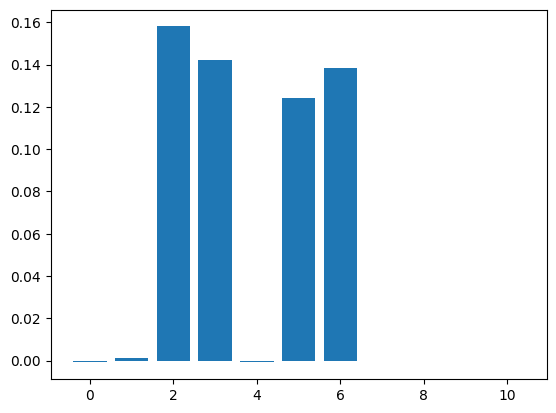

In [ ]:
# Create pipeline
fs_gt_under = Pipeline([('scale', StandardScaler()),
                        ('gradient', GradientBoostingClassifier(random_state=seed))])

# Fit model
fs_gt_under.fit(X_train_under, y_train_under)

# Scoring validation before proceed feature selection
org_val_score = fs_gt_under.score(X_val, y_val)

# Feature Selection
result = permutation_importance(fs_gt_under, X_val, y_val, scoring='accuracy', random_state=seed)

# Get importance
importance = result.importances_mean

# Show result of each feature
for i in range(len(importance)):
    print(f'feature name: {X_train.columns[i]} = {importance[i]}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# show only importance feature
new_feature_gt_under = []

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] > 0:

        new_feature_gt_under.append(X_train.columns[i])

        print(f"  {X_train.columns[i]}"
              f"  {result.importances_mean[i]:.4f}"
              f" +/- {result.importances_std[i]:.4f}")

  oldbalanceOrg  0.1580 +/- 0.0032
  newbalanceOrig  0.1422 +/- 0.0019
  payment  0.1384 +/- 0.0030
  newbalanceDest  0.1243 +/- 0.0035
  amount  0.0012 +/- 0.0002


In [ ]:
# Observe new feature value
print(new_feature_gt_under)

['oldbalanceOrg', 'newbalanceOrig', 'payment', 'newbalanceDest', 'amount']


In [ ]:
# Remove feature that is not importance
X_train_gt_under = X_train_under.loc[:,new_feature_gt_under]
X_val_gt_under = X_val.loc[:,new_feature_gt_under]

# Observe new shape
print(f'original shape: {X_train_under.shape}')
print(f'new shape of train data: {X_train_gt_under.shape}\n')

print(f'original shape: {X_val.shape}')
print(f'new shape of validation data: {X_val_gt_under.shape}\n')

original shape: (98, 11)
new shape of train data: (98, 5)

original shape: (6250, 11)
new shape of validation data: (6250, 5)



In [ ]:
# Evalute after feature selection

# Create pipeline
fs_gt_under = Pipeline([('scale', StandardScaler()),
                        ('gradient', GradientBoostingClassifier(random_state=seed))])

# Fit model
fs_gt_under.fit(X_train_gt_under, y_train_under)

# Append score into Pandas Dataframe
fs_score.iloc[0,4] = org_val_score
fs_score.iloc[0,5] = fs_gt_under.score(X_val_gt_under, y_val)

fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,0.71744,0.71776,0.8544,0.90736
oversampling,0.95168,0.9712,0.96,0.9128,NaN,NaN
smote,0.97216,0.97552,0.97344,0.98784,NaN,NaN


In [ ]:
pca_score.iloc[0,4] = org_val_score

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,NaN,0.71744,NaN,0.8544,NaN
oversampling,0.95168,NaN,0.96,NaN,NaN,NaN
smote,0.97216,NaN,0.97344,NaN,NaN,NaN


### Random Oversampling

feature name: step = -0.00022400000000002417
feature name: amount = 0.0023039999999999727
feature name: oldbalanceOrg = 0.10239999999999996
feature name: newbalanceOrig = 0.11324799999999997
feature name: oldbalanceDest = 6.399999999995298e-05
feature name: newbalanceDest = 0.011871999999999971
feature name: payment = 0.007903999999999956
feature name: cash_out = -2.2204460492503132e-17
feature name: transfer = 0.0004159999999999497
feature name: cash_in = -0.0001600000000000046
feature name: debit = 0.0


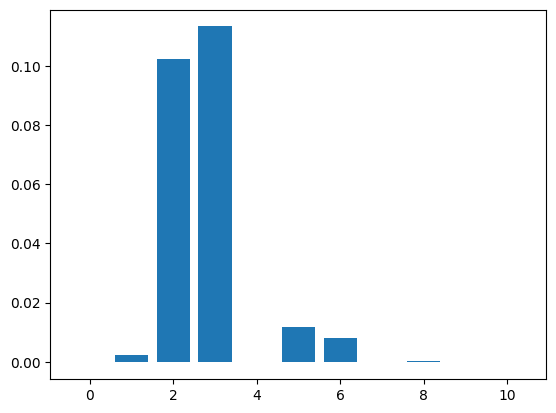

In [ ]:
# Create pipeline
fs_gt_over = Pipeline([('scale', StandardScaler()),
                        ('gradient', GradientBoostingClassifier(random_state=seed))])

# Fit model
fs_gt_over.fit(X_train_over, y_train_over)

# Scoring validation before proceed feature selection
org_val_score = fs_gt_over.score(X_val, y_val)

# Feature Selection
result = permutation_importance(fs_gt_over, X_val, y_val, scoring='accuracy', random_state=seed)

# Get importance
importance = result.importances_mean

# Show result of each feature
for i in range(len(importance)):
    print(f'feature name: {X_train.columns[i]} = {importance[i]}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# show only importance feature
new_feature_gt_over = []

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] > 0:

        new_feature_gt_over.append(X_train.columns[i])

        print(f"  {X_train.columns[i]}"
              f"  {result.importances_mean[i]:.4f}"
              f" +/- {result.importances_std[i]:.4f}")

  newbalanceOrig  0.1132 +/- 0.0027
  oldbalanceOrg  0.1024 +/- 0.0020
  newbalanceDest  0.0119 +/- 0.0006
  payment  0.0079 +/- 0.0007
  amount  0.0023 +/- 0.0006
  transfer  0.0004 +/- 0.0002
  oldbalanceDest  0.0001 +/- 0.0003


In [ ]:
# Observe new feature value
print(new_feature_gt_over)

['newbalanceOrig', 'oldbalanceOrg', 'newbalanceDest', 'payment', 'amount', 'transfer', 'oldbalanceDest']


In [ ]:
# Remove feature that is not importance
X_train_gt_over = X_train_over.loc[:,new_feature_gt_over]
X_val_gt_over = X_val.loc[:,new_feature_gt_over]

# Observe new shape
print(f'original shape: {X_train_over.shape}')
print(f'new shape of train data: {X_train_gt_over.shape}\n')

print(f'original shape: {X_val.shape}')
print(f'new shape of validation data: {X_val_gt_over.shape}\n')

original shape: (74902, 11)
new shape of train data: (74902, 7)

original shape: (6250, 11)
new shape of validation data: (6250, 7)



In [ ]:
# Evalute after feature selection

# Create pipeline
fs_gt_over = Pipeline([('scale', StandardScaler()),
                        ('gradient', GradientBoostingClassifier(random_state=seed))])

# Fit model
fs_gt_over.fit(X_train_gt_over, y_train_over)

# Append score into Pandas Dataframe
fs_score.iloc[1,4] = org_val_score
fs_score.iloc[1,5] = fs_gt_over.score(X_val_gt_over, y_val)

fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,0.71744,0.71776,0.8544,0.90736
oversampling,0.95168,0.9712,0.96,0.9128,0.99664,0.99664
smote,0.97216,0.97552,0.97344,0.98784,NaN,NaN


In [ ]:
pca_score.iloc[1,4] = org_val_score

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,NaN,0.71744,NaN,0.8544,NaN
oversampling,0.95168,NaN,0.96,NaN,0.99664,NaN
smote,0.97216,NaN,0.97344,NaN,NaN,NaN


### SMOTE

feature name: step = -0.0009279999999999733
feature name: amount = 0.005312000000000006
feature name: oldbalanceOrg = 0.11219200000000004
feature name: newbalanceOrig = 0.12790400000000002
feature name: oldbalanceDest = 0.00022400000000002417
feature name: newbalanceDest = 0.010784000000000016
feature name: payment = 0.01337600000000001
feature name: cash_out = 0.0008319999999999883
feature name: transfer = 0.0012160000000000393
feature name: cash_in = -3.199999999998759e-05
feature name: debit = 0.0


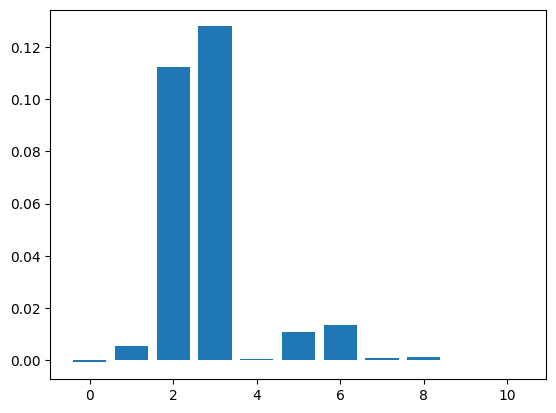

In [ ]:
# Create pipeline
fs_gt_smote = Pipeline([('scale', StandardScaler()),
                        ('gradient', GradientBoostingClassifier(random_state=seed))])

# Fit model
fs_gt_smote.fit(X_train_smote, y_train_smote)

# Scoring validation before proceed feature selection
org_val_score = fs_gt_smote.score(X_val, y_val)

# Feature Selection
result = permutation_importance(fs_gt_smote, X_val, y_val, scoring='accuracy', random_state=seed)

# Get importance
importance = result.importances_mean

# Show result of each feature
for i in range(len(importance)):
    print(f'feature name: {X_train.columns[i]} = {importance[i]}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# show only importance feature
new_feature_gt_smote = []

for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] > 0:

        new_feature_gt_smote.append(X_train.columns[i])

        print(f"  {X_train.columns[i]}"
              f"  {result.importances_mean[i]:.4f}"
              f" +/- {result.importances_std[i]:.4f}")

  newbalanceOrig  0.1279 +/- 0.0027
  oldbalanceOrg  0.1122 +/- 0.0025
  payment  0.0134 +/- 0.0006
  newbalanceDest  0.0108 +/- 0.0012
  amount  0.0053 +/- 0.0009
  transfer  0.0012 +/- 0.0001
  cash_out  0.0008 +/- 0.0002
  oldbalanceDest  0.0002 +/- 0.0004


In [ ]:
# Observe new feature value
print(new_feature_gt_smote)

['newbalanceOrig', 'oldbalanceOrg', 'payment', 'newbalanceDest', 'amount', 'transfer', 'cash_out', 'oldbalanceDest']


In [ ]:
# Remove feature that is not importance
X_train_gt_smote = X_train_smote.loc[:,new_feature_gt_smote]
X_val_gt_smote = X_val.loc[:,new_feature_gt_smote]

# Observe new shape
print(f'original shape: {X_train_smote.shape}')
print(f'new shape of train data: {X_train_gt_smote.shape}\n')

print(f'original shape: {X_val.shape}')
print(f'new shape of validation data: {X_val_gt_smote.shape}\n')

original shape: (74902, 11)
new shape of train data: (74902, 8)

original shape: (6250, 11)
new shape of validation data: (6250, 8)



In [ ]:
# Evalute after feature selection

# Create pipeline
fs_gt_smote = Pipeline([('scale', StandardScaler()),
                        ('gradient', GradientBoostingClassifier(random_state=seed))])

# Fit model
fs_gt_smote.fit(X_train_gt_smote, y_train_smote)

# Append score into Pandas Dataframe
fs_score.iloc[2,4] = org_val_score
fs_score.iloc[2,5] = fs_gt_smote.score(X_val_gt_smote, y_val)

fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,0.71744,0.71776,0.8544,0.90736
oversampling,0.95168,0.9712,0.96,0.9128,0.99664,0.99664
smote,0.97216,0.97552,0.97344,0.98784,0.9928,0.99056


In [ ]:
pca_score.iloc[2,4] = org_val_score

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,NaN,0.71744,NaN,0.8544,NaN
oversampling,0.95168,NaN,0.96,NaN,0.99664,NaN
smote,0.97216,NaN,0.97344,NaN,0.9928,NaN



## Evaluation  (Question2.1)

*  ในขั้นตอนนี้จะดำเนินการทำ Feature Selection โดยจะทำการทดลองใน 3 โมเดล ได้แก่
    1. Logistic Regression
    2. Support Vector Machine
    3. Gradient Boosting

* ซึ่งจะใช้ข้อมูลที่ได้จากเทคนิคการแก้ไขปัญหาของ Imbalanced data ทั้ง 3 แบบ ดังที่ได้แสดงในขั้นตอนก่อนหน้า มาใช้ร่วมกับโมเดลเพื่อจะทำการเปรียบเทียบประสิทธิภาพระหว่างการทำ Feature Selection และการที่ไม่ทำ เพื่อดูว่าประสิทธิภาพของวิธีไหนจะดีกว่ากัน ซึ่งในครั้งนี้จะใช้ค่า Accuracy เป็น Metric ที่ใช้ในการประเมิน

### Question:  เปรียบเทียบประสิทธิภาพของการเลือกฟีเจอร์กับการใช้ข้อมูลเต็มฟีเจอร์

In [ ]:
# Show the result
fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,0.71744,0.71776,0.8544,0.90736
oversampling,0.95168,0.9712,0.96,0.9128,0.99664,0.99664
smote,0.97216,0.97552,0.97344,0.98784,0.9928,0.99056


*  จากตารางแสดงค่า Accuracy ด้านบนจะพบว่า ทุกโมเดลนั้นมีค่า Accuracy ที่สูงมากในทุกวิธี ทั้งแบบที่ทำ Feature Selection และที่ไม่ทำ จึงจะขออภิปรายผลลัพธ์ของแต่ละโมเดล ตามรายละเอียดด้านล่างนี้

    1. Logistic Regression: <br> โมเดลจะมีประสิทธิภาพจากทำการ Feature Selection มากขึ้น เมื่อใช้ข้อมูลที่สร้างมาจากเทคนิค Random Oversampling และ SMOTE ซึ่งก็เป็นหนึ่งในเทคนิคที่ทำการเพิ่มจำนวนข้อมูล <br> โดยหากสังเกตที่ SMOTE จะเห็นว่า ค่า Accuracy แบบที่ทำ Feature Selection และไม่ทำมีค่าเท่ากันนั้นก็เป็นเพราะในการทำ Feature Selection ไม่ได้มีการตัด Feature ใดอออกไป เนื่องจากทุก Feature มีค่า Importance score มากกว่า 0 ตาม threshold ที่กำหนด <br> และในส่วนของ Random Undersampling พบว่า ประสิทธิภาพของโมเดลลดลงหลังจากการทำ Feature Selection

    2. Support Vector Machine: <br> โมเดลมีประสิทธิภาพดีขึ้นจากการทำ Feature Selection เมื่อใช้ข้อมูลจากเทคนิค Random Undersampling และ SMOTE และจะลดลงเมื่อใช้ข้อมูลจากเทคนิค Random Oversampling

    3. Gradient Boosting: <br> เป็นโมเดลที่มีประสิทธิภาพสูงที่สุด เมื่อเทียบกับอีก 2 โมเดล ซึ่งหากทำการเปรียบเทียบระหว่างการทำ Feature Selection และไม่ทำพบว่า การทำ Feature Selection จากข้อมูลทุกรูปแบบมีประสิทธิภาพที่ลดลง

* โดยสรุปแล้ว โมเดลที่ใช้ข้อมูลของทุก feature จะมีประสิทธิภาพดีกว่า โมเดลที่ใช้ข้อมูลที่ได้จากการเลือก feature (Feature Selection) อยู่ที่สัดส่วน 5 ต่อ 9 ซึ่งแสดงให้เห็นว่า ทั้ง 2 รูปแบบ มีส่วนทำให้ประสิทธิภาพโมเดลดีขึ้นเท่าๆ กัน ทั้งนี้ด้วยค่า Accuracy ที่ไม่ได้มีความแตกต่างกันมาก การที่ใช้ข้อมูลของทุก feature อาจจะเป็นวิธีที่ดีกว่า ถ้าหากมองในแง่ต้นทุนของเวลาที่ใช้ในการประมวลของโมเดล

### Question:  อภิปรายว่า ฟีเจอร์ที่มีความสำคัญในแบบจำลองชนิดต่างๆที่ใช้ในการเปรียบเทียบ เป็นฟีเจอร์ชุดเดียวกันหรือแตกต่างกันอย่างไร

In [ ]:
# Create dataframe for summary the total of feature in each model and imbalanced technique
data = [new_feature_lg_under, new_feature_lg_over, new_feature_lg_smote,
        new_feature_svm_under, new_feature_svm_over, new_feature_svm_smote,
        new_feature_gt_under, new_feature_gt_over, new_feature_gt_smote
        ]

new_features = pd.DataFrame.from_records(data).T
new_features.columns = ['logistic_under', 'logistic_over', 'logistic_smote',
                        'svm_under', 'svm_over', 'svm_smote',
                        'gradient_under', 'gradient_over', 'gradient_smote']

# Show the result
new_features.fillna('')

,logistic_under,logistic_over,logistic_smote,svm_under,svm_over,svm_smote,gradient_under,gradient_over,gradient_smote
0,oldbalanceOrg,newbalanceDest,payment,payment,oldbalanceOrg,payment,oldbalanceOrg,newbalanceOrig,newbalanceOrig
1,oldbalanceDest,oldbalanceOrg,cash_out,oldbalanceDest,newbalanceOrig,oldbalanceOrg,newbalanceOrig,oldbalanceOrg,oldbalanceOrg
2,step,oldbalanceDest,newbalanceDest,cash_in,newbalanceDest,newbalanceOrig,payment,newbalanceDest,payment
3,newbalanceDest,newbalanceOrig,oldbalanceOrg,oldbalanceOrg,payment,cash_out,newbalanceDest,payment,newbalanceDest
4,,transfer,newbalanceOrig,newbalanceDest,oldbalanceDest,cash_in,amount,amount,amount
5,,,oldbalanceDest,step,amount,newbalanceDest,,transfer,transfer
6,,,cash_in,,debit,transfer,,oldbalanceDest,cash_out
7,,,transfer,,,debit,,,oldbalanceDest
8,,,debit,,,oldbalanceDest,,,
9,,,amount,,,amount,,,


In [ ]:
# Observe description
new_features.describe()

,logistic_under,logistic_over,logistic_smote,svm_under,svm_over,svm_smote,gradient_under,gradient_over,gradient_smote
count,4,5,10,6,7,10,5,7,8
unique,4,5,10,6,7,10,5,7,8
top,oldbalanceOrg,newbalanceDest,payment,payment,oldbalanceOrg,payment,oldbalanceOrg,newbalanceOrig,newbalanceOrig
freq,1,1,1,1,1,1,1,1,1


* ส่วนมากแล้ว Feature ที่มีความสำคัญในโมเดลชนิดต่างๆ ที่ใช้ในการเปรียบเทียบ ไม่ใช่ Feature ชุดเดียวกัน จะมีเพียงโมเดล Logistic Regression ที่ใช้ข้อมูล SMOTE และ Support Vector Machine ที่ใช้ข้อมูล SMOTE เท่านั้น ที่มีจำนวน Feature ที่สำคัญเท่ากันคือ 10 Features รวมถึง Feature ที่สำคัญก็เป็น Feature ชุดเดียวกัน

* และยังมีโมเดล Gradient Boosting ที่ใช้ข้อมูล Random Oversampling และข้อมูล SMOTE ก็พบว่า จำนวน Feature ที่สำคัญมีจำนวนเท่ากันและเป็น Feature ชุดเดียวกัน

* โดยถ้าจะเปรียบเทียบระหว่างทั้ง 3 โมเดล จะเห็นได้ว่า โมเดล Gradient Boosting มีจำนวน Feature ที่มีความสำคัญมากกว่าโมเดลที่เหลือ ถ้าหากใช้ข้อมูลจากเทคนิค Random Undersampling และ Random Oversampling แต่อีก 2 โมเดลที่เหลือคือ โมเดล Logistic Regression และโมเดล Support Vector Machine จะมีจำนวน Feature ที่มีความสำคัญมากกว่าโมเดล Gradient Boosting ในกรณีที่ใช้ข้อมูลจากเทคนิค SMOTE

* ซึ่งหากสังเกตจากข้อมูลที่ใช้ในแต่ละโมเดลจะพบว่า ข้อมูลที่มาจากเทคนิค Random Undersampling จะมีจำนวน Feature ที่มีความสำคัญน้อยกว่าเทคนิคอื่นๆ ซึ่งจะมีประมาณ 36-55% ของ Feature ทั้งหมด

* ส่วนเทคนิค Random Oversampling นั้นจะมีจำนวน Feature ที่มีความสำคัญอยู่ที่ประมาณ 45-73% ของ Feature ทั้งหมด ซึ่งถือว่ามีจำนวนมากกว่าเทคนิค Random Undersampling

* และสำหรับเทคนิค SMOTE นั้น พบว่า เป็นเทคนิคที่มีจำนวน Feature ที่มีความสำคัญมากที่สุดในแต่ละโมเดล โดยจะอยู่ประมาณ 72-91%

# Dimensionality Reduction: Using PCA Method


## Logistic Regression

###Random Undersampling

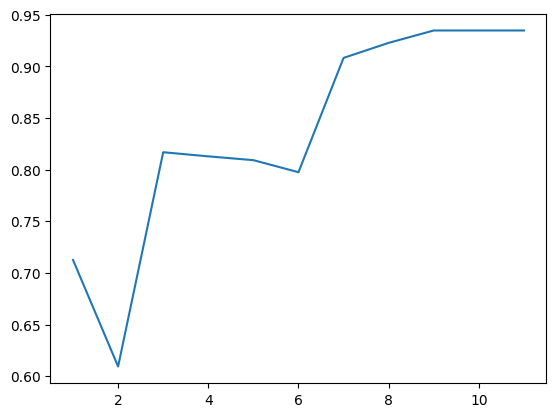

max acc at k=9 acc of 0.93488


In [ ]:
# Observe best n-component and accuracy
lix = []
liy = []
index=0
acc=0

for k in range(1, 12):

    pca_lg_under = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=k)),
                        ('logistic', LogisticRegression(C=10000, solver="liblinear", random_state=seed))])

    pca_lg_under.fit(X_train_under, y_train_under)

    liy.append(pca_lg_under.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()

best_n_lg_under = int(index+1)
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
# Create pipeline
pca_lg_under = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=best_n_lg_under)),
                        ('logistic', LogisticRegression(C=10000, solver="liblinear", random_state=seed))])

# Fit model
pca_lg_under.fit(X_train_under, y_train_under)

# Append score into Pandas Dataframe
pca_score.iloc[0,1] = pca_lg_under.score(X_val, y_val)

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,NaN,0.8544,NaN
oversampling,0.95168,NaN,0.96,NaN,0.99664,NaN
smote,0.97216,NaN,0.97344,NaN,0.9928,NaN


###Random Oversampling

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


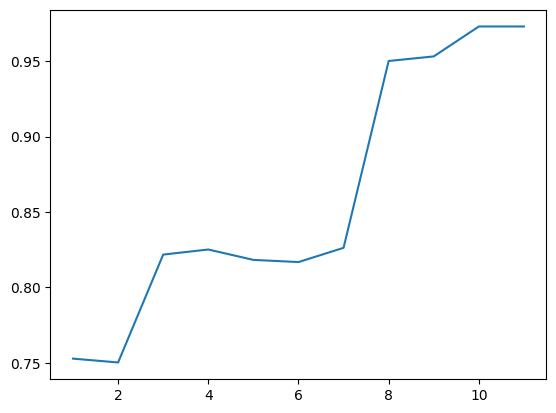

max acc at k=10 acc of 0.97296


In [ ]:
# Observe best n-component and accuracy
lix = []
liy = []
index=0
acc=0

for k in range(1, 12):

    pca_lg_over = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=k)),
                        ('logistic', LogisticRegression(C=10000, solver="liblinear", random_state=seed))])

    pca_lg_over.fit(X_train_over, y_train_over)

    liy.append(pca_lg_over.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()

best_n_lg_over = int(index+1)
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
# Create pipeline
pca_lg_over = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=best_n_lg_over)),
                        ('logistic', LogisticRegression(C=10000, solver="liblinear", random_state=seed))])

# Fit model
pca_lg_over.fit(X_train_over, y_train_over)

# Append score into Pandas Dataframe
pca_score.iloc[1,1] = pca_lg_over.score(X_val, y_val)

pca_score

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,NaN,0.8544,NaN
oversampling,0.95168,0.97296,0.96,NaN,0.99664,NaN
smote,0.97216,NaN,0.97344,NaN,0.9928,NaN


### SMOTE

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


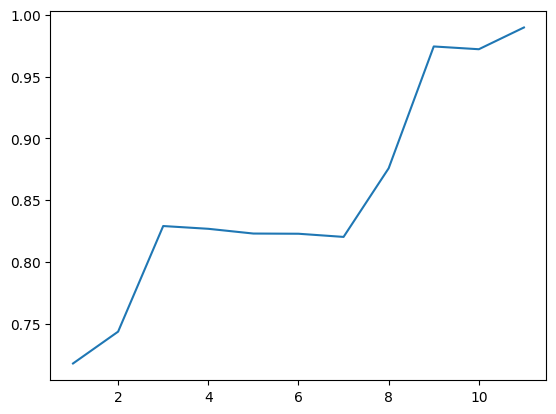

max acc at k=11 acc of 0.98976


In [ ]:
# Observe best n-component and accuracy
lix = []
liy = []
index=0
acc=0

for k in range(1, 12):

    pca_lg_smote = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=k)),
                        ('logistic', LogisticRegression(C=10000, solver="liblinear", random_state=seed))])

    pca_lg_smote.fit(X_train_smote, y_train_smote)

    liy.append(pca_lg_smote.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()

best_n_lg_smote = int(index+1)
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
# Create pipeline
pca_lg_smote = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=best_n_lg_smote)),
                        ('logistic', LogisticRegression(C=10000, solver="liblinear", random_state=seed))])

# Fit model
pca_lg_smote.fit(X_train_smote, y_train_smote)

# Append score into Pandas Dataframe
pca_score.iloc[2,1] = pca_lg_smote.score(X_val, y_val)

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,NaN,0.8544,NaN
oversampling,0.95168,0.97296,0.96,NaN,0.99664,NaN
smote,0.97216,0.98976,0.97344,NaN,0.9928,NaN


## Support Vector Machine

### Random Undersampling

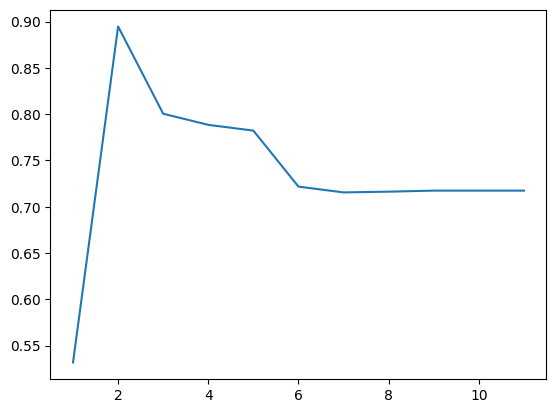

max acc at k=2 acc of 0.89472


In [ ]:
# Observe best n-component and accuracy
lix = []
liy = []
index=0
acc=0

for k in range(1, 12):

    pca_svm_under = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=k)),
                        ('svm', SVC(random_state=seed))])

    pca_svm_under.fit(X_train_under, y_train_under)

    liy.append(pca_svm_under.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()

best_n_svm_under = int(index+1)
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
# Create pipeline
pca_svm_under = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=best_n_svm_under)),
                        ('svm', SVC(random_state=seed))])

# Fit model
pca_svm_under.fit(X_train_under, y_train_under)

# Append score into Pandas Dataframe
pca_score.iloc[0,3] = pca_svm_under.score(X_val, y_val)

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,0.89472,0.8544,NaN
oversampling,0.95168,0.97296,0.96,NaN,0.99664,NaN
smote,0.97216,0.98976,0.97344,NaN,0.9928,NaN


### Random Oversampling

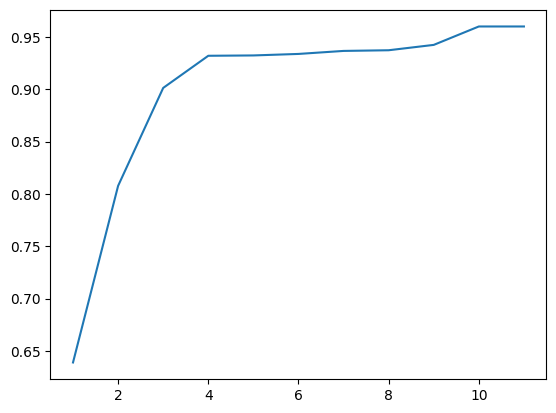

max acc at k=10 acc of 0.96


In [ ]:
# Observe best n-component and accuracy
lix = []
liy = []
index=0
acc=0

for k in range(1, 12):

    pca_svm_over = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=k)),
                        ('svm', SVC(random_state=seed))])

    pca_svm_over.fit(X_train_over, y_train_over)

    liy.append(pca_svm_over.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()

best_n_svm_over = int(index+1)
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
# Create pipeline
pca_svm_over = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=best_n_svm_over)),
                        ('svm', SVC(random_state=seed))])

# Fit model
pca_svm_over.fit(X_train_over, y_train_over)

# Append score into Pandas Dataframe
pca_score.iloc[1,3] = pca_svm_over.score(X_val, y_val)

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,0.89472,0.8544,NaN
oversampling,0.95168,0.97296,0.96,0.96,0.99664,NaN
smote,0.97216,0.98976,0.97344,NaN,0.9928,NaN


### SMOTE

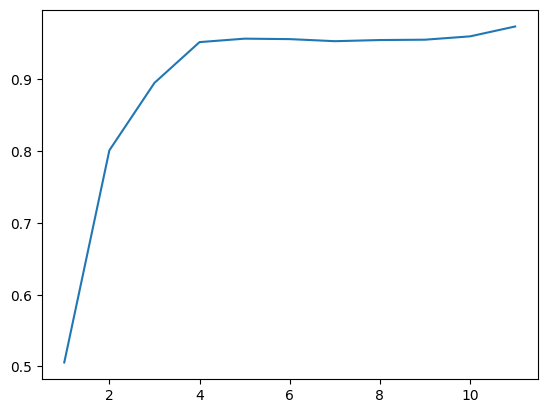

max acc at k=11 acc of 0.97344


In [ ]:
# Observe best n-component and accuracy
lix = []
liy = []
index=0
acc=0

for k in range(1, 12):

    pca_svm_smote = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=k)),
                        ('svm', SVC(random_state=seed))])

    pca_svm_smote.fit(X_train_smote, y_train_smote)

    liy.append(pca_svm_smote.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()

best_n_svm_smote = int(index+1)
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
# Create pipeline
pca_svm_smote = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=best_n_svm_smote)),
                        ('svm', SVC(random_state=seed))])

# Fit model
pca_svm_smote.fit(X_train_smote, y_train_smote)

# Append score into Pandas Dataframe
pca_score.iloc[2,3] = pca_svm_smote.score(X_val, y_val)

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,0.89472,0.8544,NaN
oversampling,0.95168,0.97296,0.96,0.96,0.99664,NaN
smote,0.97216,0.98976,0.97344,0.97344,0.9928,NaN


## GradientBoosting

### Random Undersampling

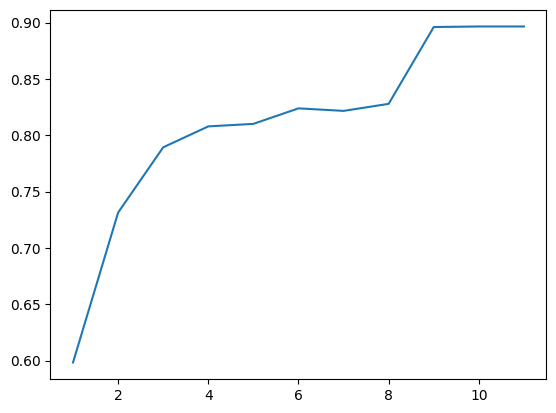

max acc at k=10 acc of 0.89648


In [ ]:
# Observe best n-component and accuracy
lix = []
liy = []
index=0
acc=0

for k in range(1, 12):

    pca_gt_under = Pipeline([('scale', StandardScaler()),
                            ('pca', PCA(n_components=k)),
                            ('gradient', GradientBoostingClassifier(random_state=seed))])

    pca_gt_under.fit(X_train_under, y_train_under)

    liy.append(pca_gt_under.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()

best_n_gt_under = int(index+1)
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
# Create pipeline
pca_gt_under =  Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=k)),
                        ('gradient', GradientBoostingClassifier(random_state=seed))])

# Fit model
pca_gt_under.fit(X_train_under, y_train_under)

# Append score into Pandas Dataframe
pca_score.iloc[0,5] = pca_gt_under.score(X_val, y_val)

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,0.89472,0.8544,0.89648
oversampling,0.95168,0.97296,0.96,0.96,0.99664,NaN
smote,0.97216,0.98976,0.97344,0.97344,0.9928,NaN


### Random Oversampling

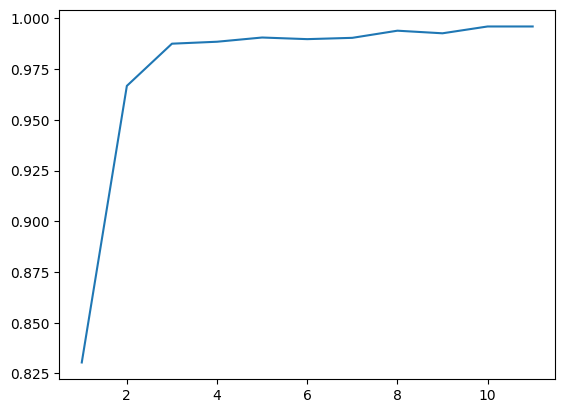

max acc at k=10 acc of 0.996


In [ ]:
# Observe best n-component and accuracy
lix = []
liy = []
index=0
acc=0

for k in range(1, 12):

    pca_gt_over = Pipeline([('scale', StandardScaler()),
                            ('pca', PCA(n_components=k)),
                            ('gradient', GradientBoostingClassifier(random_state=seed))])

    pca_gt_over.fit(X_train_over, y_train_over)

    liy.append(pca_gt_over.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()

best_n_gt_over = int(index+1)
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
# Create pipeline
pca_gt_over = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=k)),
                        ('gradient', GradientBoostingClassifier(random_state=seed))])

# Fit model
pca_gt_over.fit(X_train_over, y_train_over)

# Append score into Pandas Dataframe
pca_score.iloc[1,5] = pca_gt_over.score(X_val, y_val)

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,0.89472,0.8544,0.89648
oversampling,0.95168,0.97296,0.96,0.96,0.99664,0.996
smote,0.97216,0.98976,0.97344,0.97344,0.9928,NaN


### SMOTE

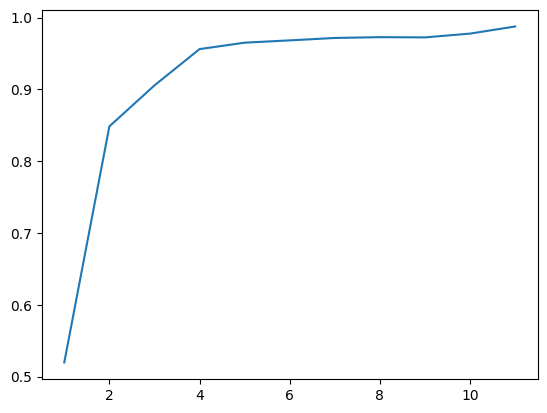

max acc at k=11 acc of 0.98768


In [ ]:
# Observe best n-component and accuracy
lix = []
liy = []
index=0
acc=0

for k in range(1, 12):

    pca_gt_smote = Pipeline([('scale', StandardScaler()),
                            ('pca', PCA(n_components=k)),
                            ('gradient', GradientBoostingClassifier(random_state=seed))])

    pca_gt_smote.fit(X_train_smote, y_train_smote)

    liy.append(pca_gt_smote.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()

best_n_gt_smote = int(index+1)
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
# Create pipeline
pca_gt_smote = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=k)),
                        ('gradient', GradientBoostingClassifier(random_state=seed))])

# Fit model
pca_gt_smote.fit(X_train_smote, y_train_smote)

# Append score into Pandas Dataframe
pca_score.iloc[2,5] = pca_gt_smote.score(X_val, y_val)

pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,0.89472,0.8544,0.89648
oversampling,0.95168,0.97296,0.96,0.96,0.99664,0.996
smote,0.97216,0.98976,0.97344,0.97344,0.9928,0.98768


## Evaluation (Q2.2)

In [ ]:
# Score of pca
pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,0.89472,0.8544,0.89648
oversampling,0.95168,0.97296,0.96,0.96,0.99664,0.996
smote,0.97216,0.98976,0.97344,0.97344,0.9928,0.98768


In [ ]:
# Create dataframe for summary the total of feature in each model and imbalanced technique
best_n_components = pd.DataFrame(columns=['logistic_regression', 'support_vector_machine', 'gradient_boosting'],
                                index=['undersampling', 'oversampling', 'smote'])

best_n_components.loc['undersampling'] = best_n_lg_under, best_n_svm_under, best_n_gt_under
best_n_components.loc['oversampling'] = best_n_lg_over, best_n_svm_over, best_n_gt_over
best_n_components.loc['smote'] = best_n_lg_smote, best_n_svm_smote, best_n_gt_smote

best_n_components

,logistic_regression,support_vector_machine,gradient_boosting
undersampling,9,2,10
oversampling,10,10,10
smote,11,11,11


* ผลลัพธ์ที่ได้จากการทำ Dimensionality Reduction ด้วยการใช้วิธี Principal Component Analysis หรือ PCA พบว่า จาก 5 ใน 9 รูปแบบ ที่ได้ทำการทดลอง โมเดลมีค่า Accuracy ที่เพิ่มขึ้นหลังจากการทำ PCA และมีเพียง 2 รูปแบบเท่านั้น ที่ค่า Accuracy ลดลง โดยจะขออภิปรายแยกแต่ละโมเดลดังนี้

    1. Logistic Regression: <br> ในโมเดลนี้ ข้อมูลทุกเทคนิคที่ใช้ล้วนมีประสิทธิภาพดีขึ้นกว่าเดิมทั้งหมด โดยเฉพาะข้อมูลที่มาจากเทคนิค Random Undersampling ที่มีค่า Accuracy ก่อนการทำ PCA = 0.77376	และหลังจากการทำ PCA พบว่า ค่า Accuracy เพิ่มขึ้นอย่างมากเป็น 0.93488

    2. Support Vector Machine: <br> ในส่วนของข้อมูลที่มาจากเทคนิค Random Undersampling พบว่า หลังจากทำ PCA มีค่า Accuracy ที่สูงอย่างมาก แต่เมื่อสังเกตในข้อมูลจากเทคนิค Random Oversampling และ SMOTE จะพบว่า การทำ PCA ไม่ได้ทำให้โมเดลมีประสิทธิภาพที่ดีขึ้นหรือค่า Accuracy ที่สูงขึ้น เนื่องจากค่า Accuracy ก่อนและหลังทำ PCA มีค่าที่เท่ากัน

    3. Gradient Boosting: <br> โมเดลมีประสิทธิภาพดีขึ้น เมื่อใช้ PCA กับข้อมูลจากเทคนิค Random Undersampling ในทางตรงกันข้าม โมเดลกลับมีค่า Accuracy ลดลง หลังจากการทำ PCA ด้วยข้อมูลจากเทคนิค Random Oversampling และ SMOTE

* จากการวิเคราะห์ผลลัพธ์ในแต่ละโมเดลทำให้สรุปได้ว่า การทำ PCA นั้นมีประโยชน์อย่างมาก ถ้าหากนำไปใช้กับข้อมูลที่มีจำนวนน้อย ซึ่งในกรณีนี้คือ ข้อมูลที่มาจากเทคนิค Random Undersampling เพราะจะช่วยทำให้โมเดลมีประสิทธิภาพหรือค่า Accuracy ที่สูงขึ้นอย่างเห็นได้ชัดดังตารางที่แสดง

### อภิปรายและเปรียบเทียบผลการเลือกฟีเจอร์กับการใช้ PCA ว่ามีผลแตกต่างกันอย่างไร

In [ ]:
# Score of feature selection
fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,0.71744,0.71776,0.8544,0.90736
oversampling,0.95168,0.9712,0.96,0.9128,0.99664,0.99664
smote,0.97216,0.97552,0.97344,0.98784,0.9928,0.99056


In [ ]:
overall= fs_score.copy()

overall

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,0.71744,0.71776,0.8544,0.90736
oversampling,0.95168,0.9712,0.96,0.9128,0.99664,0.99664
smote,0.97216,0.97552,0.97344,0.98784,0.9928,0.99056


In [ ]:
overall.insert(2, 'pca_logistic', pca_score['pca_logistic'])
overall.insert(5, 'pca_svm', pca_score['pca_svm'])
overall.insert(8, 'pca_boosting', pca_score['pca_boosting'])

print(overall)

              org_logistic selected_logistic pca_logistic  org_svm  \
undersampling      0.77376           0.65968      0.93488  0.71744   
oversampling       0.95168            0.9712      0.97296     0.96   
smote              0.97216           0.97552      0.98976  0.97344   

              selected_svm  pca_svm org_boosting selected_boosting  \
undersampling      0.71776  0.89472       0.8544           0.90736   
oversampling        0.9128     0.96      0.99664           0.99664   
smote              0.98784  0.97344       0.9928           0.99056   

              pca_boosting  
undersampling      0.89648  
oversampling         0.996  
smote              0.98768  


In [ ]:
# Compare score between feature selection and pca
display(overall)

,org_logistic,selected_logistic,pca_logistic,org_svm,selected_svm,pca_svm,org_boosting,selected_boosting,pca_boosting
undersampling,0.77376,0.65968,0.93488,0.71744,0.71776,0.89472,0.8544,0.90736,0.89648
oversampling,0.95168,0.9712,0.97296,0.96,0.9128,0.96,0.99664,0.99664,0.996
smote,0.97216,0.97552,0.98976,0.97344,0.98784,0.97344,0.9928,0.99056,0.98768


* จากตารางผลลัพธ์ด้านบนแสดงให้เห็นว่า ส่วนใหญ่แล้ว ผลลัพธ์ที่ได้จากการทำ Feature Selection และการทำ PCA ล้วนแต่จะทำให้โมเดลมีประสิทธิภาพที่ดีขึ้น มีเพียงบางส่วนเท่านั้นที่มีประสิทธิภาพเท่าเดิมหรือลดลง

* โดยหากสังเกตที่ผลลัพธ์หรือค่า Accuracy ที่ได้จากการทำ Feature Selection จะพบว่า การทำ Feature Selection จะทำให้โมเดลมีค่า Accuracy ที่สูงกว่าการทำ PCA ถ้าหากใช้กับโมเดล Gradient Boosting

* แต่สำหรับโมเดล Logistic Regression และโมเดล Support Vector Machine พบว่า การทำ PCA นั้น จะทำให้โมเดลมีค่า Accuracy ที่สูงมากกว่าการทำ Feature Selection

# Modeling and Evaluation

## Logistic Regression:  Using SMOTE + PCA

In [ ]:
# Create pipeline
logistic_pipeline = Pipeline([
                    ('scale', StandardScaler()),
                    ('pca', PCA(n_components=best_n_lg_smote)),
                    ('logistic', LogisticRegression(random_state=seed))])

# Create grid parameters
logistic_param = {'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'logistic__max_iter': [300, 600, 1000]
                  }

# Fit model
logistic_grid = GridSearchCV(logistic_pipeline , param_grid=logistic_param, cv=10, return_train_score=True)

logistic_grid.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA(n_components=11)),
                                       ('logistic',
                                        LogisticRegression(random_state=55))]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'logistic__max_iter': [300, 600, 1000]},
             return_train_score=True)

In [ ]:
# Show validate and test score
print(f'best mean score of validation data:   {(logistic_grid.best_score_)} \n')
print(f'best parameter:   {logistic_grid.best_params_} \n')
print(f'accuracy of test data:   {logistic_grid.score(X_test,y_test)}')

best mean score of validation data:   0.9896665192712787 

best parameter:   {'logistic__C': 1000, 'logistic__max_iter': 300} 

accuracy of test data:   0.98592


In [ ]:
# Create dataframe for storing score
model_score = pd.DataFrame(columns=['validation_score','test_score'],
                        index=['logistic_regression', 'support_vector_machine', 'gradient_boosting'])

# Append score
model_score.loc['logistic_regression'] = logistic_grid.best_score_, logistic_grid.score(X_test,y_test)

model_score

,validation_score,test_score
logistic_regression,0.989667,0.98592
support_vector_machine,NaN,NaN
gradient_boosting,NaN,NaN


In [ ]:
# View classification report
y_pred_lg = logistic_grid.predict(X_test)

print(classification_report(y_test, y_pred_lg, target_names=['not_fraud', 'fraud']))

              precision    recall  f1-score   support

   not_fraud       1.00      0.99      0.99      6242
       fraud       0.08      1.00      0.15         8

    accuracy                           0.99      6250
   macro avg       0.54      0.99      0.57      6250
weighted avg       1.00      0.99      0.99      6250



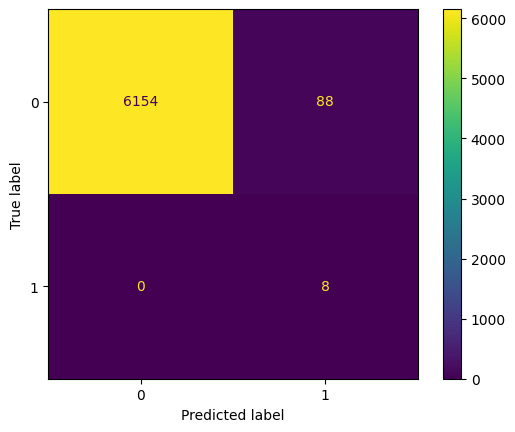

In [ ]:
# Display confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_lg, labels=logistic_grid.classes_)
disp_lg = ConfusionMatrixDisplay(confusion_matrix=cm_lg, display_labels=logistic_grid.classes_)
disp_lg.plot()
plt.show()

## Support Vector Machine:  Using SMOTE + Feature Selection

In [ ]:
# Transform test data
X_test_fs = X_test.loc[:,new_feature_svm_smote]

print(f'original shape: {X_test.shape}')
print(f'new shape of test data: {X_test_fs.shape}')

original shape: (6250, 11)
new shape of test data: (6250, 10)


In [ ]:
# Create pipeline
svc_pipeline = Pipeline([
                ('scale', StandardScaler()),
                ('svc', SVC(random_state=seed))])

# Create grid parameters
svc_param = {'svc__C': [0.1, 1, 10],
            'svc__gamma': [1, 0.1, 0.01],
            'svc__kernel': ['linear', 'rbf']}

# Fit model
svc_grid = GridSearchCV(svc_pipeline, param_grid=svc_param, cv=10, return_train_score=True)

svc_grid.fit(X_train_svm_smote, y_train_smote)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svc', SVC(random_state=55))]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [1, 0.1, 0.01],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [ ]:
print(f'best mean score of validation data:   {(svc_grid.best_score_)} \n')
print(f'best parameter:   {svc_grid.best_params_} \n')
print(f'accuracy of test data:   {svc_grid.score(X_test_fs, y_test)}')

best mean score of validation data:   0.9874369367852014 

best parameter:   {'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'} 

accuracy of test data:   0.98064


In [ ]:
# Append score
model_score.loc['support_vector_machine'] = svc_grid.best_score_, svc_grid.score(X_test_fs,y_test)

model_score

,validation_score,test_score
logistic_regression,0.989667,0.98592
support_vector_machine,0.987437,0.98064
gradient_boosting,NaN,NaN


In [ ]:
# View classification report
y_pred_svc = svc_grid.predict(X_test_fs)

print(classification_report(y_test, y_pred_svc, target_names=['not_fraud', 'fraud']))

              precision    recall  f1-score   support

   not_fraud       1.00      0.98      0.99      6242
       fraud       0.06      0.88      0.10         8

    accuracy                           0.98      6250
   macro avg       0.53      0.93      0.55      6250
weighted avg       1.00      0.98      0.99      6250



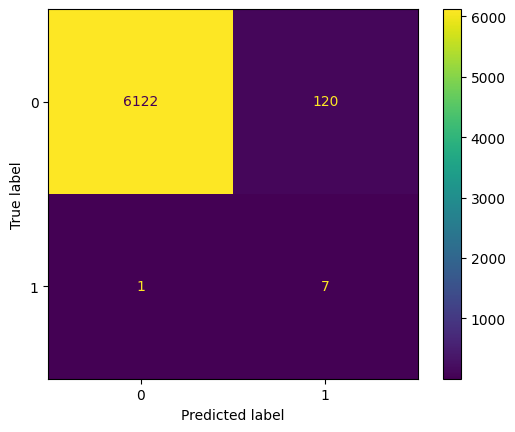

In [ ]:
# Display confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc, labels=svc_grid.classes_)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_grid.classes_)
disp_svc.plot()
plt.show()

## GradientBoosting: Using Random Oversampling + Full Feature

In [ ]:
# Create pipeline
gradient_pipeline = Pipeline([
                    ('scale', StandardScaler()),
                    ('gradient', GradientBoostingClassifier(random_state=seed))])


# Create grid parameters
gradient_param = {
    'gradient__learning_rate': [.5, .1, .01, .001],
    'gradient__max_depth': [2, 4],
    'gradient__n_estimators': [100, 200],
    'gradient__subsample': [0.5, 0.8]
    }

# Fit model
gradient_grid = GridSearchCV(gradient_pipeline, param_grid=gradient_param, cv=10, return_train_score=True)

gradient_grid.fit(X_train_over, y_train_over)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('gradient',
                                        GradientBoostingClassifier(random_state=55))]),
             param_grid={'gradient__learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'gradient__max_depth': [2, 4],
                         'gradient__n_estimators': [100, 200],
                         'gradient__subsample': [0.5, 0.8]},
             return_train_score=True)

In [ ]:
print(f'best mean score of validation data:   {(gradient_grid.best_score_)} \n')
print(f'best parameter:   {gradient_grid.best_params_} \n')
print(f'accuracy of test data:   {gradient_grid.score(X_test, y_test)}')

best mean score of validation data:   0.9999732995125973 

best parameter:   {'gradient__learning_rate': 0.5, 'gradient__max_depth': 4, 'gradient__n_estimators': 200, 'gradient__subsample': 0.8} 

accuracy of test data:   0.99968


In [ ]:
# Append score
model_score.loc['gradient_boosting'] = gradient_grid.best_score_, gradient_grid.score(X_test,y_test)

model_score

,validation_score,test_score
logistic_regression,0.989667,0.98592
support_vector_machine,0.987437,0.98064
gradient_boosting,0.999973,0.99968


In [ ]:
# View classification report
y_pred_gradient = gradient_grid.predict(X_test)

print(classification_report(y_test, y_pred_gradient, target_names=['not_fraud', 'fraud']))

              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00      6242
       fraud       0.88      0.88      0.88         8

    accuracy                           1.00      6250
   macro avg       0.94      0.94      0.94      6250
weighted avg       1.00      1.00      1.00      6250



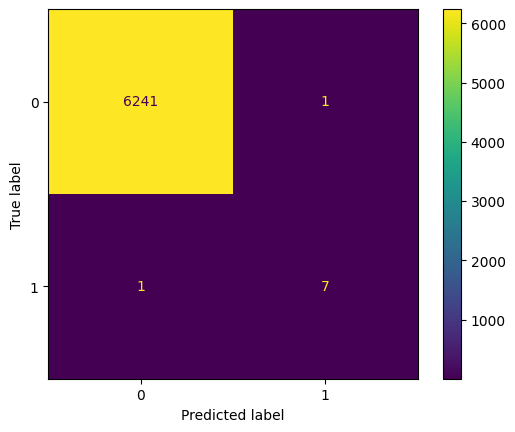

In [ ]:
# Display confusion matrix
cm_gt = confusion_matrix(y_test, y_pred_gradient, labels=gradient_grid.classes_)
disp_gt = ConfusionMatrixDisplay(confusion_matrix=cm_gt, display_labels=gradient_grid.classes_)
disp_gt.plot()
plt.show()

# Conclusion

จากผลลัพธ์ที่ได้ทั้งหมด ขอสรุปผลการอภิปรายในแต่ละหัวข้อ ตามรายละเอียดด้านล่างค่ะ


## 1. เปรียบเทียบประสิทธิภาพของเทคนิคการแก้ปัญหา Imbalanced อย่างน้อย 3 วิธีขึ้นไป ต่อชุดข้อมูล


* ในโปรเจคได้ทำการเลือกวิธีการแก้ปัญหา Imbalanced มาทั้งหมด 3 วิธี ดังแสดงตามด้านล่าง โดยจะใช้โมเดล Random Forest Classifier เป็นโมเดลที่ใช้ในการวัดประสิทธิภาพของแต่ละเทคนิค
    1. Random Undersampling
    2. Random Oversampling
    3. SMOTE

In [ ]:
# show score of each technique
imbalance_score

,recall,f1,accuracy,precision,roc_auc,average_precision
original,0.665,0.765,0.999573,1.0,0.92532,0.771214
undersampling,0.94,0.032854,0.925573,0.016734,0.984032,0.579162
oversampling,0.585,0.701508,0.999467,1.0,0.94847,0.774611
smote,0.73,0.502036,0.997973,0.394371,0.998329,0.725615


**ผลลัพธ์ที่ได้จากการทดลอง**

* เนื่องจากในการประเมินประสิทธิภาพของชุดข้อมูลที่มีปัญหา Imbalanced จะไม่สามารถใช้ค่า Accuracy ในการประเมินประสิทธิภาพได้ เนื่องจากถ้าหากโมเดลทำการทำนายข้อมูลที่เป็นกลุ่ม Positive (Minority class) ถูกเพียง 1 ครั้ง จะทำให้ค่า Accuracy นั้นสูงมาก ซึ่งไม่ได้สะท้อนความสามารถของโมเดลได้อย่างแท้จริง ดังนั้นจะทำการใช้ Metrics อื่น มาใช้ในการประเมินแทน

* จากผลลัพธ์ที่แสดงข้างต้นพบว่า ทุกเทคนิคมีค่า roc_auc ค่อนข้างสูงและมีค่าใกล้เคียงกัน ส่วนค่า Average Precision จะพบว่า เทคนิค Random Undersampling มีค่าน้อยที่สุด โดยถัดไปจะขออภิปรายผลลัพท์ของค่าอื่นๆ ในแต่ละเทคนิคตามรายละเอียดด้านล่างนี้

    1. เทคนิค Random Undersampling: <br> มีค่า F1-score และ Precision ที่ต่ำมาก แต่มีค่า Recall ที่สูงที่สุดเมื่อเทียบกับเทคนิคอื่นๆ

    2. เทคนิค Random Oversampling: <br> มีค่า F1-score และ Precision ที่สูงมาก และมีค่า Recall ปานกลาง ซึ่งมีค่าน้อยกว่าเทคนิคอื่นๆ

    3. เทคนิค SMOTE: <br> มีค่า F1-score ปานกลาง และ Precision ที่ค่อนข้างน้อย แต่มีค่า Recall ที่ค่อนข้างสูง โดยสูงรองลงมาจากเทคนิค  Random Undersampling

* โดยจากข้อมูลทั้งหมดจะพบว่า เทคนิค Random Undersampling และ  SMOTE น่าจะเป็นเทคนิคที่เหมาะสำหรับการใช้งานโปรเจคนี้ เนื่องจากมีความสามารถในการทำนายกลุ่ม Positive จากกลุ่ม Positive ทั้งหมดได้ดี หรือสามารถทำนายธุรกิจกรรมที่เป็น Fraud จากข้อมูลธุรกรรม  Fraud ทั้งหมดได้มาก ซึ่งสังเกตได้จากค่า Recall ที่สูง

* แต่ถ้าสังเกตจากค่า Precision แล้วจะพบว่า เทคนิค Random Undersampling มีค่า Precision ที่ต่ำมากแสดงถึง ความสามารถในทำนายกลุ่ม Positive ได้ถูกต้อง จากการทำนายว่าเป็นกลุ่ม Positive ทั้งหมดนั้นน้อยมาก

* ส่วนเทคนิค Random Oversampling นั้นก็น่าจะสามารถนำมาใช้งานได้ เนื่องจากมีค่า Recall ที่ระดับปานกลาง รวมถึงค่า Precision ที่ค่อนข้างสูง จึงคาดว่าน่าจะมีประสิทธิภาพที่ดีในระดับนึง

* โดยถ้ามองจากภาพรวมแล้ว จึงสรุปได้ว่า เทคนิคที่น่าจะมีประสิทธิภาพดีและเหมาะสมกับชุดข้อมูลนี้จะเป็น เทคนิค Random Oversampling และเทคนิค SMOTE

## 2. การเลือกฟีเจอร์
    
    
    

###     2.1) เปรียบเทียบประสิทธิภาพของการเลือกฟีเจอร์กับการใช้ข้อมูลเต็มฟีเจอร์ อภิปรายว่า ฟีเจอร์ที่มีความสำคัญในแบบจำลองชนิดต่างๆที่ใช้ในการเปรียบเทียบ เป็นฟีเจอร์ชุดเดียวกัน หรือแตกต่างกันอย่างไร

* ในโปรเจคได้เลือกใช้วิธี Permutation Feature Importance มาใช้ในการทำ Feature Selection โดยทำการทดลองในแต่ละโมเดลและแต่ละชุดข้อมูลที่ได้มาจากการแก้ปัญหา Imbalanced ซึ่งโมเดลและชุดข้อมูลที่นำมาใช้จะมีจำนวนอย่างละ 3  โดยจะทำให้ได้รูปแบบของโมเดลและชุดข้อมูลออกมาทั้งหมด 9 รูปแบบ ดังนี้
    1. Logistic Regression + ข้อมูลจาก Random Undersampling
    2. Logistic Regression + ข้อมูลจาก Random Oversampling
    3. Logistic Regression + ข้อมูลจาก SMOTE
    ---
    4. Support Vector Machine + ข้อมูลจาก Random Undersampling
    5. Support Vector Machine + ข้อมูลจาก Random Oversampling
    6. Support Vector Machine + ข้อมูลจาก SMOTE
    ---
    7. Gradient Boosting + ข้อมูลจาก Random Undersampling
    8. Gradient Boosting + ข้อมูลจาก Random Oversampling
    9. Gradient Boosting + ข้อมูลจาก SMOTE

**เปรียบเทียบประสิทธิภาพของการเลือกฟีเจอร์กับการใช้ข้อมูลเต็มฟีเจอร์**

In [ ]:
# Show the result
fs_score

,org_logistic,selected_logistic,org_svm,selected_svm,org_boosting,selected_boosting
undersampling,0.77376,0.65968,0.71744,0.71776,0.8544,0.90736
oversampling,0.95168,0.9712,0.96,0.9128,0.99664,0.99664
smote,0.97216,0.97552,0.97344,0.98784,0.9928,0.99056


**ผลลัพธ์ที่ได้จากการทดลอง**

*  จากตารางแสดงค่า Accuracy ด้านบนจะพบว่า ทุกโมเดลนั้นมีค่า Accuracy ที่สูงมากในทุกวิธี ทั้งแบบที่ทำ Feature Selection และที่ไม่ทำ จึงจะขออภิปรายผลลัพธ์ของแต่ละโมเดล ตามรายละเอียดด้านล่างนี้

    1. Logistic Regression: <br> โมเดลจะมีประสิทธิภาพจากทำการ Feature Selection มากขึ้น เมื่อใช้ข้อมูลที่สร้างมาจากเทคนิค Random Oversampling และ SMOTE ซึ่งก็เป็นหนึ่งในเทคนิคที่ทำการเพิ่มจำนวนข้อมูล <br> โดยหากสังเกตที่ SMOTE จะเห็นว่า ค่า Accuracy แบบที่ทำ Feature Selection และไม่ทำมีค่าเท่ากันนั้นก็เป็นเพราะในการทำ Feature Selection ไม่ได้มีการตัด Feature ใดอออกไป เนื่องจากทุก Feature มีค่า Importance score มากกว่า 0 ตาม threshold ที่กำหนด <br> และในส่วนของ Random Undersampling พบว่า ประสิทธิภาพของโมเดลลดลงหลังจากการทำ Feature Selection

    2. Support Vector Machine: <br> โมเดลมีประสิทธิภาพดีขึ้นจากการทำ Feature Selection เมื่อใช้ข้อมูลจากเทคนิค Random Undersampling และ SMOTE และจะลดลงเมื่อใช้ข้อมูลจากเทคนิค Random Oversampling

    3. Gradient Boosting: <br> เป็นโมเดลที่มีประสิทธิภาพสูงที่สุด เมื่อเทียบกับอีก 2 โมเดล ซึ่งหากทำการเปรียบเทียบระหว่างการทำ Feature Selection และไม่ทำพบว่า การทำ Feature Selection จากข้อมูลทุกรูปแบบมีประสิทธิภาพที่ลดลง

* โดยสรุปแล้ว โมเดลที่ใช้ข้อมูลของทุก feature จะมีประสิทธิภาพดีกว่า โมเดลที่ใช้ข้อมูลที่ได้จากการเลือก feature (Feature Selection) อยู่ที่สัดส่วน 5 ต่อ 9 ซึ่งแสดงให้เห็นว่า ทั้ง 2 รูปแบบ มีส่วนทำให้ประสิทธิภาพโมเดลดีขึ้นเท่าๆ กัน ทั้งนี้ด้วยค่า Accuracy ที่ไม่ได้มีความแตกต่างกันมาก การที่ใช้ข้อมูลของทุก feature อาจจะเป็นวิธีที่ดีกว่า ถ้าหากมองในแง่ต้นทุนของเวลาที่ใช้ในการประมวลของโมเดล

**อภิปรายว่า ฟีเจอร์ที่มีความสำคัญในแบบจำลองชนิดต่างๆ ที่ใช้ในการเปรียบเทียบ เป็นฟีเจอร์ชุดเดียวกัน หรือแตกต่างกันอย่างไร**

In [ ]:
new_features.fillna('')

,logistic_under,logistic_over,logistic_smote,svm_under,svm_over,svm_smote,gradient_under,gradient_over,gradient_smote
0,oldbalanceOrg,newbalanceDest,payment,payment,oldbalanceOrg,payment,oldbalanceOrg,newbalanceOrig,newbalanceOrig
1,oldbalanceDest,oldbalanceOrg,cash_out,oldbalanceDest,newbalanceOrig,oldbalanceOrg,newbalanceOrig,oldbalanceOrg,oldbalanceOrg
2,step,oldbalanceDest,newbalanceDest,cash_in,newbalanceDest,newbalanceOrig,payment,newbalanceDest,payment
3,newbalanceDest,newbalanceOrig,oldbalanceOrg,oldbalanceOrg,payment,cash_out,newbalanceDest,payment,newbalanceDest
4,,transfer,newbalanceOrig,newbalanceDest,oldbalanceDest,cash_in,amount,amount,amount
5,,,oldbalanceDest,step,amount,newbalanceDest,,transfer,transfer
6,,,cash_in,,debit,transfer,,oldbalanceDest,cash_out
7,,,transfer,,,debit,,,oldbalanceDest
8,,,debit,,,oldbalanceDest,,,
9,,,amount,,,amount,,,


In [ ]:
# Observe description
new_features.describe()

,logistic_under,logistic_over,logistic_smote,svm_under,svm_over,svm_smote,gradient_under,gradient_over,gradient_smote
count,4,5,10,6,7,10,5,7,8
unique,4,5,10,6,7,10,5,7,8
top,oldbalanceOrg,newbalanceDest,payment,payment,oldbalanceOrg,payment,oldbalanceOrg,newbalanceOrig,newbalanceOrig
freq,1,1,1,1,1,1,1,1,1


**ผลลัพธ์ที่ได้จากการทดลอง**

* ส่วนมากแล้ว Feature ที่มีความสำคัญในโมเดลชนิดต่างๆ ที่ใช้ในการเปรียบเทียบ ไม่ใช่ Feature ชุดเดียวกัน จะมีเพียงโมเดล Logistic Regression ที่ใช้ข้อมูล SMOTE และ Support Vector Machine ที่ใช้ข้อมูล SMOTE เท่านั้น ที่มีจำนวน Feature ที่สำคัญเท่ากันคือ 10 Features รวมถึง Feature ที่สำคัญก็เป็น Feature ชุดเดียวกัน

* และยังมีโมเดล Gradient Boosting ที่ใช้ข้อมูล Random Oversampling และข้อมูล SMOTE ก็พบว่า จำนวน Feature ที่สำคัญมีจำนวนเท่ากันและเป็น Feature ชุดเดียวกัน

* โดยถ้าจะเปรียบเทียบระหว่างทั้ง 3 โมเดล จะเห็นได้ว่า โมเดล Gradient Boosting มีจำนวน Feature ที่มีความสำคัญมากกว่าโมเดลที่เหลือ ถ้าหากใช้ข้อมูลจากเทคนิค Random Undersampling และ Random Oversampling แต่อีก 2 โมเดลที่เหลือคือ โมเดล Logistic Regression และโมเดล Support Vector Machine จะมีจำนวน Feature ที่มีความสำคัญมากกว่าโมเดล Gradient Boosting ในกรณีที่ใช้ข้อมูลจากเทคนิค SMOTE

* ซึ่งหากสังเกตจากข้อมูลที่ใช้ในแต่ละโมเดลจะพบว่า ข้อมูลที่มาจากเทคนิค Random Undersampling จะมีจำนวน Feature ที่มีความสำคัญน้อยกว่าเทคนิคอื่นๆ ซึ่งจะมีประมาณ 36-55% ของ Feature ทั้งหมด

* ส่วนเทคนิค Random Oversampling นั้นจะมีจำนวน Feature ที่มีความสำคัญอยู่ที่ประมาณ 45-73% ของ Feature ทั้งหมด ซึ่งถือว่ามีจำนวนมากกว่าเทคนิค Random Undersampling

* และสำหรับเทคนิค SMOTE นั้น พบว่า เป็นเทคนิคที่มีจำนวน Feature ที่มีความสำคัญมากที่สุดในแต่ละโมเดล โดยจะอยู่ประมาณ 72-91%

### 2.2) อภิปราย และเปรียบเทียบผลการเลือกฟีเจอร์ กับการใช้ PCA ว่ามีผลแตกต่างกันอย่างไร

* ในโปรเจคได้เลือกใช้วิธี Principal Component Analysis หรือ PCA ในการทำ Dimensionality Reduction ซึ่งจะทำการทดลองกับโมเดลและชุดข้อมูลทั้งหมด 9 รูปแบบ เหมือนกับที่ทำใน Feature Selection

In [ ]:
# Score of pca
pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,0.89472,0.8544,0.89648
oversampling,0.95168,0.97296,0.96,0.96,0.99664,0.996
smote,0.97216,0.98976,0.97344,0.97344,0.9928,0.98768


In [ ]:
# Number of component
best_n_components

,logistic_regression,support_vector_machine,gradient_boosting
undersampling,9,2,10
oversampling,10,10,10
smote,11,11,11


**ผลลัพธ์ที่ได้จากการทดลอง**

* ผลลัพธ์ที่ได้จากการทำ Dimensionality Reduction ด้วยการใช้วิธี Principal Component Analysis หรือ PCA พบว่า จาก 5 ใน 9 รูปแบบ ที่ได้ทำการทดลอง โมเดลมีค่า Accuracy ที่เพิ่มขึ้นหลังจากการทำ PCA และมีเพียง 2 รูปแบบเท่านั้น ที่ค่า Accuracy ลดลง โดยจะขออภิปรายแยกแต่ละโมเดลดังนี้

    1. Logistic Regression: <br> ในโมเดลนี้ ข้อมูลทุกเทคนิคที่ใช้ล้วนมีประสิทธิภาพดีขึ้นกว่าเดิมทั้งหมด โดยเฉพาะข้อมูลที่มาจากเทคนิค Random Undersampling ที่มีค่า Accuracy ก่อนการทำ PCA = 0.77376	และหลังจากการทำ PCA พบว่า ค่า Accuracy เพิ่มขึ้นอย่างมากเป็น 0.93488

    2. Support Vector Machine: <br> ในส่วนของข้อมูลที่มาจากเทคนิค Random Undersampling พบว่า หลังจากทำ PCA มีค่า Accuracy ที่สูงอย่างมาก แต่เมื่อสังเกตในข้อมูลจากเทคนิค Random Oversampling และ SMOTE จะพบว่า การทำ PCA ไม่ได้ทำให้โมเดลมีประสิทธิภาพที่ดีขึ้นหรือค่า Accuracy ที่สูงขึ้น เนื่องจากค่า Accuracy ก่อนและหลังทำ PCA มีค่าที่เท่ากัน

    3. Gradient Boosting: <br> โมเดลมีประสิทธิภาพดีขึ้น เมื่อใช้ PCA กับข้อมูลจากเทคนิค Random Undersampling ในทางตรงกันข้าม โมเดลกลับมีค่า Accuracy ลดลง หลังจากการทำ PCA ด้วยข้อมูลจากเทคนิค Random Oversampling และ SMOTE

* จากการวิเคราะห์ผลลัพธ์ในแต่ละโมเดลทำให้สรุปได้ว่า การทำ PCA นั้นมีประโยชน์อย่างมาก ถ้าหากนำไปใช้กับข้อมูลที่มีจำนวนน้อย ซึ่งในกรณีนี้คือ ข้อมูลที่มาจากเทคนิค Random Undersampling เพราะจะช่วยทำให้โมเดลมีประสิทธิภาพหรือค่า Accuracy ที่สูงขึ้นอย่างเห็นได้ชัดดังตารางที่แสดง

In [ ]:
# Compare score between feature selection and pca
display(overall)

,org_logistic,selected_logistic,pca_logistic,org_svm,selected_svm,pca_svm,org_boosting,selected_boosting,pca_boosting
undersampling,0.77376,0.65968,0.93488,0.71744,0.71776,0.89472,0.8544,0.90736,0.89648
oversampling,0.95168,0.9712,0.97296,0.96,0.9128,0.96,0.99664,0.99664,0.996
smote,0.97216,0.97552,0.98976,0.97344,0.98784,0.97344,0.9928,0.99056,0.98768


**ผลลัพธ์ที่ได้จากการทดลอง**

* จากตารางผลลัพธ์ด้านบนแสดงให้เห็นว่า ส่วนใหญ่แล้ว ผลลัพธ์ที่ได้จากการทำ Feature Selection และการทำ PCA ล้วนแต่จะทำให้โมเดลมีประสิทธิภาพที่ดีขึ้น มีเพียงบางส่วนเท่านั้นที่มีประสิทธิภาพเท่าเดิมหรือลดลง

* โดยหากสังเกตที่ผลลัพธ์หรือค่า Accuracy ที่ได้จากการทำ Feature Selection จะพบว่า การทำ Feature Selection จะทำให้โมเดลมีค่า Accuracy ที่สูงกว่าการทำ PCA ถ้าหากใช้กับโมเดล Gradient Boosting

* แต่สำหรับโมเดล Logistic Regression และโมเดล Support Vector Machine พบว่า การทำ PCA นั้น จะทำให้โมเดลมีค่า Accuracy ที่สูงมากกว่าการทำ Feature Selection

## 3. เลือกแบบจำลองต่างๆ ปรับพารามิเตอร์ของแบบจำลอง หาค่าพารามิเตอร์ที่ดีที่สุด


* หลังจากเปรียบเทียบประสิทธิภาพของโมเดลระหว่างการใช้ข้อมูลเต็ม Feature, การทำ Feature Selection และ การทำ PCA ในแต่ละโมเดลแล้ว รวมถึงพิจารณาถึงชุดข้อมูลที่นำมาใช้งานด้วย  จะทำให้เราสามารถเลือกรูปแบบของชุดข้อมูลและรูปแบบ Feature ที่ทำให้แต่ละโมเดลนั้น มีประสิทธิภาพที่ดีที่สุดออกมาได้ โดยสามารถสรุปได้ดังนี้
    1. Logistic Regression: ใช้ข้อมูลจากวิธี SMOTE + ใช้ข้อมูล Feature จากการทำ PCA
    2. Support Vector Machine: ใช้ข้อมูลจากวิธี SMOTE + ใช้ข้อมูล Feature จากการทำ Feature Selection
    3. GradientBoosting: ใช้ข้อมูลจากวิธี Random Oversampling + ใช้ข้อมูลแบบเต็ม Feature

* จากนั้นจะนำโมเดลทั้ง 3 รูปแบบที่ได้มาทำการสร้างโมเดลอีกครั้ง และทำการปรับจูนหาค่าพารามิเตอร์ที่ดีที่สุด รวมถึงการนำโมเดลที่ได้มาทำการวัดประสิทธิภาพด้วย Unseen data หรือ Test data

In [ ]:
# Show the result
model_score

,validation_score,test_score
logistic_regression,0.989667,0.98592
support_vector_machine,0.987437,0.98064
gradient_boosting,0.999973,0.99968


**Logistic Regression**

In [ ]:
# Show classification report of logistic regression
print(classification_report(y_test, y_pred_lg, target_names=['not_fraud', 'fraud']))

              precision    recall  f1-score   support

   not_fraud       1.00      0.99      0.99      6242
       fraud       0.08      1.00      0.15         8

    accuracy                           0.99      6250
   macro avg       0.54      0.99      0.57      6250
weighted avg       1.00      0.99      0.99      6250



In [ ]:
# Show best parameters
print(f'best parameter:   {logistic_grid.best_params_} \n')

best parameter:   {'logistic__C': 1000, 'logistic__max_iter': 300} 



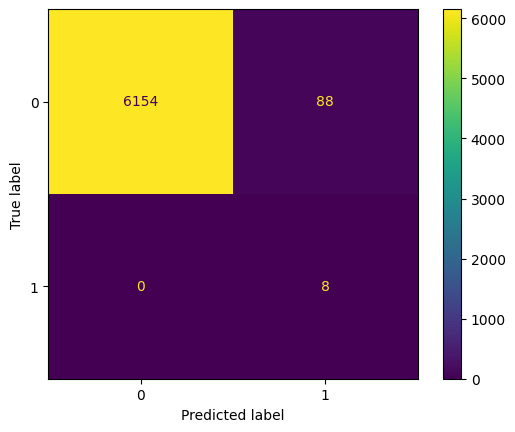

In [ ]:
# Display confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_lg, labels=logistic_grid.classes_)
disp_lg = ConfusionMatrixDisplay(confusion_matrix=cm_lg, display_labels=logistic_grid.classes_)
disp_lg.plot()
plt.show()

**Support Vector Machine**

In [ ]:
# Show classification report of support vector machine
print(classification_report(y_test, y_pred_svc, target_names=['not_fraud', 'fraud']))

              precision    recall  f1-score   support

   not_fraud       1.00      0.98      0.99      6242
       fraud       0.06      0.88      0.10         8

    accuracy                           0.98      6250
   macro avg       0.53      0.93      0.55      6250
weighted avg       1.00      0.98      0.99      6250



In [ ]:
# Show best parameters
print(f'best parameter:   {svc_grid.best_params_} \n')

best parameter:   {'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'} 



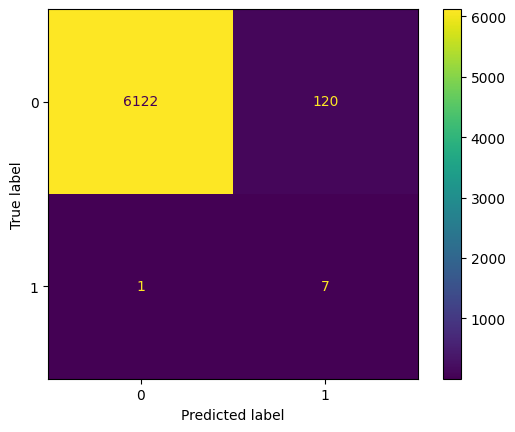

In [ ]:
# Display confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc, labels=svc_grid.classes_)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_grid.classes_)
disp_svc.plot()
plt.show()

**Gradient Boosting**

In [ ]:
# Show classification report of gradient boosting
print(classification_report(y_test, y_pred_gradient, target_names=['not_fraud', 'fraud']))

              precision    recall  f1-score   support

   not_fraud       1.00      1.00      1.00      6242
       fraud       0.88      0.88      0.88         8

    accuracy                           1.00      6250
   macro avg       0.94      0.94      0.94      6250
weighted avg       1.00      1.00      1.00      6250



In [ ]:
# Show best parameters
print(f'best parameter:   {gradient_grid.best_params_} \n')

best parameter:   {'gradient__learning_rate': 0.5, 'gradient__max_depth': 4, 'gradient__n_estimators': 200, 'gradient__subsample': 0.8} 



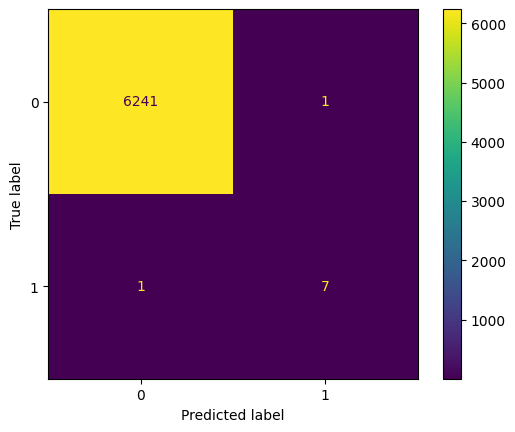

In [ ]:
# Display confusion matrix
cm_gt = confusion_matrix(y_test, y_pred_gradient, labels=gradient_grid.classes_)
disp_gt = ConfusionMatrixDisplay(confusion_matrix=cm_gt, display_labels=gradient_grid.classes_)
disp_gt.plot()
plt.show()

**ผลลัพธ์ที่ได้จากการทดลอง**

* หลังจากทำการปรับจูนพารามิเตอร์ของทั้ง 3 โมเดล ทำให้ได้ค่าพารามิเตอร์ที่ดีที่สุดของแต่ละโมเดล ดังนี้
    1. Logistic Regression:
        - C = 1000
        - max_iter = 300
    2. Support Vector Machine:
        - C = 10
        - gamma = 1
        - kernel = rbf
    3. Gradient Boosting:
        - learning_rate = 0.5
        - max_depth = 4
        - n_estimators = 200
        - subsample = 0.8

* และจากผลลัพธ์ที่ได้พบว่า ทั้ง 3 โมเดลมีค่า Accuracy ที่สูงมากจนเข้าใกล้ 1 ทั้งในการทดสอบกับ Validation set และ Test set โดยเฉพาะโมเดล Gradient Boosting ที่มีค่า Accuracy สูงที่สุด ซึ่งสันนิฐานว่า น่าจะเกิดการที่จำนวนของข้อมูลที่นำมาใช้นั้น อาจจะมีจำนวนที่น้อยเกินไป จึงอาจเป็นสาเหตุที่ทำให้เกิดการ Overfitting ขึ้นได้

*  หากทำการสังเกตเพิ่มเติมที่ Classification Report ของแต่ละโมเดล จะทำให้เราเห็นประสิทธิภาพของโมเดลได้ชัดเจนมากยิ่งขึ้น โดยจะพบว่า โมเดล Logistic Regression และโมเดล Support Vector Machine มีค่า Precision และค่า F1-score ที่ต่ำมาก แสดงให้เห็นว่า โมเดลมีความสามารถในทำนายกลุ่ม Positive ได้ถูกต้อง จากการทำนายว่าเป็นกลุ่ม Positive ทั้งหมดนั้นน้อยมาก

* ซึ่งหากดู Confusion Matrix ประกอบก็จะพบว่า โมเดล Logistic Regression มีการทำนายกลุ่ม Positive ทั้งหมด 96 แต่ทำนายถูกเพียง 8 เท่านั้น ส่วนโมเดล Support Vector Machine ก็ได้มีการทำนายกลุ่ม Positive จำนวน 127 แต่ที่ถูกต้องนั้นมี 7 จึงเป็นเหตุที่ทั้ง 2 โมเดล มีค่า Precision ที่ต่ำมาก

* ในทางกลับกับ โมเดล Gradient Boosting กลับมีค่า Precision และค่า F1-score ที่ค่อนข้างสูง เนื่องจากโมเดลมีการทำนายกลุ่ม Positive ผิดไปเพียง 1 เท่านั้น จึงอาจจะถือได้ว่า โมเดลนี้เป็นโมเดลที่มีประสิทธิภาพและมีความ Generalize ต่อชุดข้อมูลใหม่ แต่เมื่อทำการวิเคราะห์เพิ่มเติม ประกอบกับค่า Accuracy ที่สูงถึง 0.99 ของโมเดล ก็มีความเป็นไปได้ว่า โมเดลเกิดการ Overfitting จากค่าพารามิเตอร์ที่ได้ปรับจูน เช่น จำนวนความลึก (Depth) หรือจำนวนต้นไม้ (N_estimator) ที่มากเกินไป จนทำให้ความ Purity ของโมเดลนั้นสูง



## 4. สร้าง visualization ด้วยเทคนิคการลดมิติของข้อมูล เพื่อแสดงข้อมูลของกลุ่มข้อมูลคลาสต่างๆ จาก visualization ที่ได้ อภิปรายประสิทธิภาพของแบบจำลอง เทียบกับแผนภาพสองมิติของข้อมูล อภิปรายว่า จุดที่แบบจำลองจำแนกผิด มีความยากลำบายในการจำแนกมาก-น้อยเพียงใด

* เนื่องจากต้องทำการ Visualization ข้อมูลที่ได้จากการทำ PCA รวมถึงดูประสิทธิภาพของโมเดล เทียบกับแผนภาพสองมิติของข้อมูล จึงตัดสินใจที่จะเลือกโมเดล Support Vector Machine และใช้ข้อมูลจากเทคนิค Random Under Sampling มาใช้ในการแสดง Visualization และอภิปราย
* เหตุผลที่เลือกเป็นเพราะ โมเดลนี้มีประสิทธิภาพที่ดีที่สุด เมื่อใช้จำนวน principal component เท่ากับ 2 ซึ่งก็เป็นไปตามโจทย์ที่เราต้องการจะทำเพราะในการสร้างแผนภาพสองมิตินั้น จำนวน principal component สูงสุดที่จะนำมาใช้ได้ก็คือ 2 component

In [ ]:
# Number of component
best_n_components

,logistic_regression,support_vector_machine,gradient_boosting
undersampling,9,2,10
oversampling,10,10,10
smote,11,11,11


In [ ]:
# Score of pca
pca_score

,org_logistic,pca_logistic,org_svm,pca_svm,org_boosting,pca_boosting
undersampling,0.77376,0.93488,0.71744,0.89472,0.8544,0.89648
oversampling,0.95168,0.97296,0.96,0.96,0.99664,0.996
smote,0.97216,0.98976,0.97344,0.97344,0.9928,0.98768


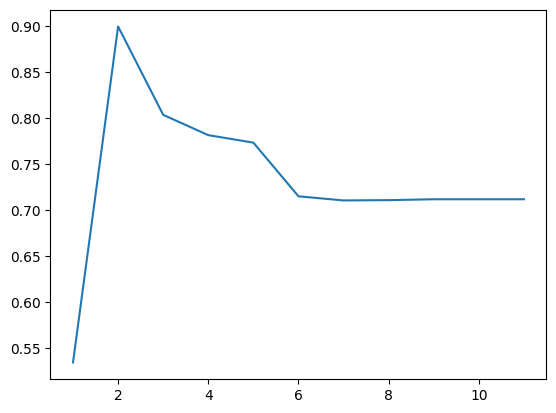

max acc at k=2 acc of 0.89968


In [ ]:
# Observe best n-component and accuracy
lix = []
liy = []
index=0
acc=0

for k in range(1, 12):

    model = Pipeline([('scale', StandardScaler()),
                        ('pca', PCA(n_components=k)),
                        ('svc', SVC(random_state=seed))])

    model.fit(X_train_under, y_train_under)

    liy.append(model.score(X_test, y_test))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()

print("max acc at k="+str(index+1)+" acc of "+str(acc))

### Visualization Each Principal Component

In [ ]:
# Scale and transform data to 2 principal components by pca
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2))

X_train_pca = pca_scaled.fit_transform(X_train_under)
X_test_pca = pca_scaled.transform(X_test)

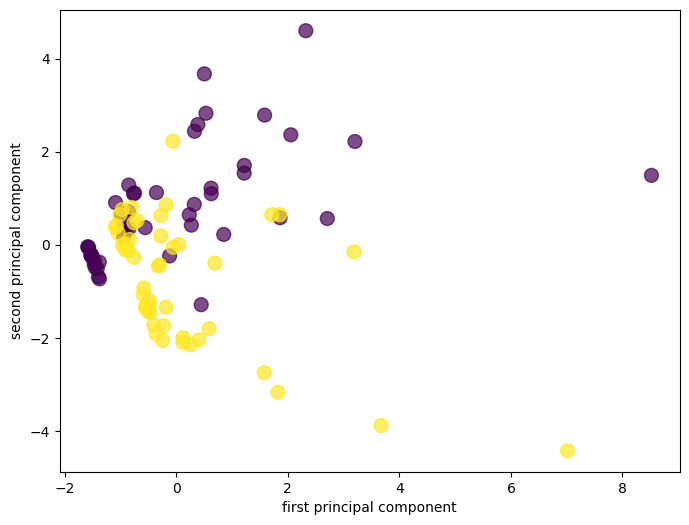

In [ ]:
# Visualize data in each component of train data
plt.figure(figsize=(8, 6))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], s=100, marker='o', c=y_train_under, alpha=.7)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

plt.show()

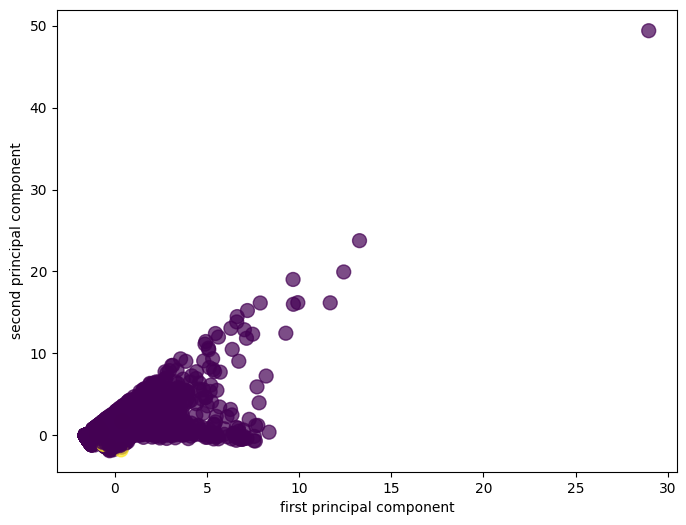

In [ ]:
# Visualize data in each component test data
plt.figure(figsize=(8, 6))

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], s=100, marker='o', c=y_test, alpha=.7)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

plt.show()

### Modeling Using Support Vector Machine Model

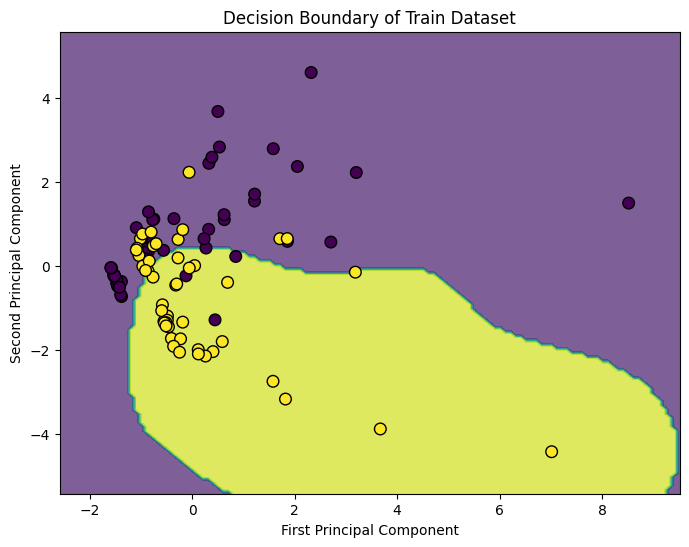

In [ ]:
# Plot train data

# Fit the logistic regression model
# model = LogisticRegression(C=1000, max_iter=300, random_state=seed).fit(X_train_pca, y_train_smote)
model = SVC(random_state=seed).fit(X_train_pca, y_train_under)

# Create a mesh to plot in
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the function value for the whole grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_under, edgecolors='k', s=70)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Decision Boundary of Train Dataset')

plt.show()

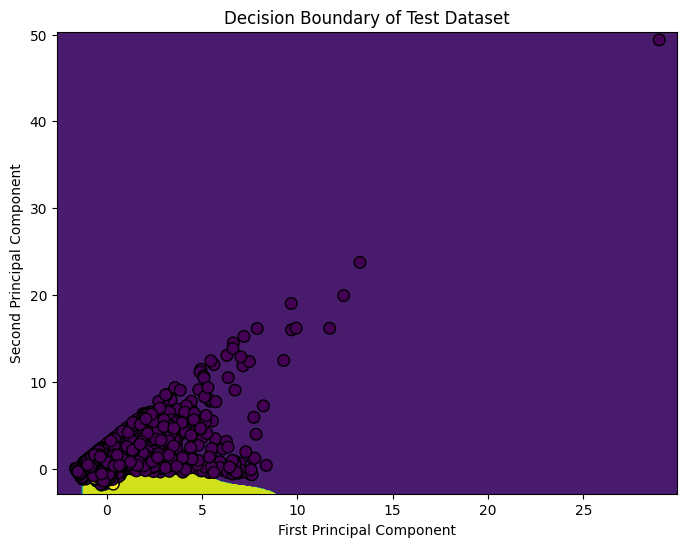

In [ ]:
# Plot test data

# Create a mesh to plot in
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)

# Plot the contour and training examples
plt.figure(figsize=(8, 6))

plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, s=70, edgecolor='k')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Decision Boundary of Test Dataset')

plt.show()

In [ ]:
# View accuracy score between train and test
print(f'Train score: {model.score(X_train_pca, y_train_under)}')
print(f'Test score: {model.score(X_test_pca, y_test)}')

Train score: 0.7755102040816326
Test score: 0.89968


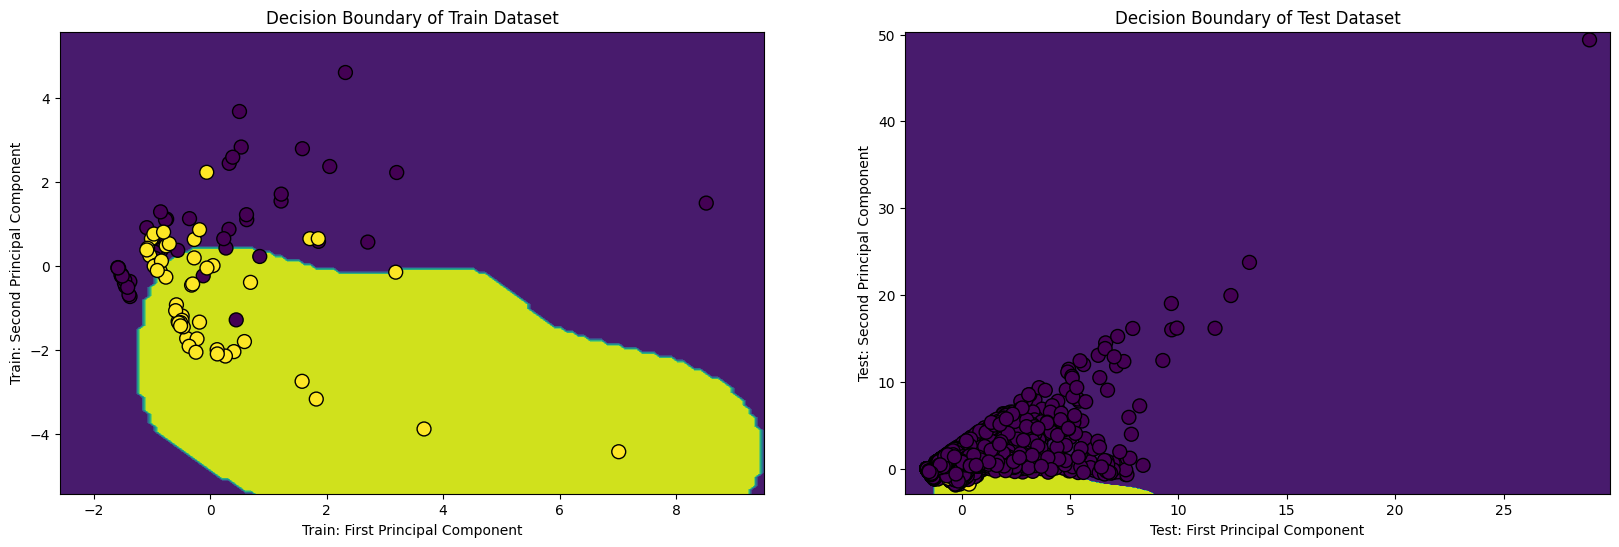

In [ ]:
# Campate chart of train and test data
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)

plt.figure(figsize = (20, 6))
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train_under, s = 100, edgecolor = 'k')
plt.xlabel('Train: First Principal Component')
plt.ylabel('Train: Second Principal Component')
plt.title('Decision Boundary of Train Dataset')

plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, s = 100, edgecolor = 'k')
plt.xlabel('Test: First Principal Component')
plt.ylabel('Test: Second Principal Component')
plt.title('Decision Boundary of Test Dataset')
plt.show()

**ผลลัพธ์ที่ได้จากการทดลอง**

* จากการวัดประสิทธิภาพที่ได้ของโมเดลพบว่า โมเดลมีค่า Accuracy อยู่ที่ 0.89968 ซึ่งถือว่าค่อนข้างสูง โดยหากพิจารณาเทียบกับแผนภาพสองมิตินั้น ก็พบว่า จุดข้อมูลส่วนใหญ่ที่ถูกจำแนกผิดใน Train dataset จะอยู่บริเวณขอบของเส้น Decision Boudary แต่อยู่ผิดฝั่ง และบางจุดก็อยู่บนเส้น Decision Boudary ซึ่งแสดงให้เห็นถึงความยากลำบากในการจำแนกอย่างมาก เนื่องจากโมเดลก็จะต้องทำการตัดสินใจว่า จุดที่อยู่บนเส้นนั้นควรจะเป็น Class ไหน
* ส่วนจุดข้อมูลที่เป็น Test dataset ก็พบว่า จุดข้อมูลมีการแบ่งแยกกันชัดเจนระหว่าง 2 Class ไม่มีมีการปนกันของจุดข้อมูลในแต่ละฝั่ง แต่เนื่องด้วยจำนวนข้อมูลของกลุ่ม Positive นั้นมีน้อยมาก จึงทำให้มีพื้นที่ขนาดเล็ก โดยหากสังเกตไปที่บริเวณขอบของเส้น Decision Boudary ก็จะพบว่า ใน Test dataset ก็มีความยากลำบากอย่างมากเช่นกัน เนื่องจากบริเวณที่จุดที่โมเดลมีการจำแนกผิดนั้น ทุกจุดล้วนอยู่บริเวณขอบหรือบนเส้น Decision Boudary ซึ่งอยู่ผิดฝั่ง แต่ยังคงอยู่ใกล้กับเส้น Decision Boudary เช่นเดียวกันกับจุดที่จำแนกผิดใน Trian dataset